### 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

### 데이터 불러오기

In [3]:
orders = pd.read_csv('C:/Users/user/Desktop/python2/project2/orders.csv')
order_items = pd.read_csv('C:/Users/user/Desktop/python2/project2/order_items.csv')
customers = pd.read_csv('C:/Users/user/Desktop/python2/project2/customers.csv')
payments = pd.read_csv('C:/Users/user/Desktop/python2/project2/payments.csv')
products = pd.read_csv('C:/Users/user/Desktop/python2/project2/products.csv')

In [3]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [4]:
orders = orders[orders['order_status']=='delivered']

### 기초통계

In [5]:
print(len(orders),len(order_items),len(customers),len(payments),len(products))

96478 112650 99441 103886 32951


### 결측치 확인

In [6]:
orders.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
dtype: int64

In [7]:
orders = orders.dropna()

In [8]:
order_items.isnull().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [9]:
customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [10]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [11]:
products.isnull().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [12]:
products['product_category_name'].value_counts()

toys                                 24725
bed_bath_table                         789
sports_leisure                         721
furniture_decor                        687
health_beauty                          648
                                     ...  
fashion_childrens_clothes                1
diapers_and_hygiene                      1
home_comfort_2                           1
security_and_services                    1
furniture_mattress_and_upholstery        1
Name: product_category_name, Length: 70, dtype: int64

In [13]:
products = products.dropna()

### 이상치 확인
price, charge, product_weight_g 등 수치형 자료에 이상치가 있어도 크게 신경 쓸 필요가 없을 거 같지만 해보자

In [14]:
order_items[['price']].describe()

,price
count,112650.000000
mean,120.653739
std,183.633928
min,0.850000
25%,39.900000
50%,74.990000
75%,134.900000
max,6735.000000


In [15]:
#
per = np.percentile(order_items['price'],q=[25,75])
q1 = per[0]
q3 = per[1]
iqr = q3 - q1
mini = q1 - 1.5 * iqr
maxi = q3 + 1.5 * iqr
print('price 범위 :',mini,maxi)

price 범위 : -102.6 277.4


In [16]:
order_items[order_items['price']>277.4]

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,810.00,70.75
16,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,639.00,11.34
26,0011d82c4b53e22e84023405fb467e57,1,c389f712c4b4510bc997cee93e8b1a28,bfd27a966d91cfaafdb25d076585f0da,289.00,26.33
30,00137e170939bba5a3134e2386413108,1,672e757f331900b9deea127a2a7b79fd,e59aa562b9f8076dd550fcddf0e73491,397.00,24.65
39,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,809.10,44.29
...,...,...,...,...,...,...
112586,ffdc5e3279114c523a09296f8fd28331,1,5e70a4508abd5d19bfe7f110785294c8,328acb143b4a73aad6bee8e734f5d20d,299.99,17.80
112592,ffde92ba447b33a47d1c04d203f10f41,1,a97cd00f5c1dbfbc7f0f4b6c1032253e,b347677812ea483b0f528eaf8cbc09b7,278.00,26.70
112632,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,736.00,20.91
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41


In [17]:
order_items[['shipping_charges']].describe()

,shipping_charges
count,112650.000000
mean,19.990320
std,15.806405
min,0.000000
25%,13.080000
50%,16.260000
75%,21.150000
max,409.680000


In [18]:
#
per = np.percentile(order_items['shipping_charges'],q=[25,75])
q1 = per[0]
q3 = per[1]
iqr = q3 - q1
mini = q1 - 1.5 * iqr
maxi = q3 + 1.5 * iqr
print('shipping_charges 범위 :',mini,maxi)

shipping_charges 범위 : 0.9750000000000032 33.254999999999995


In [19]:
order_items[order_items['shipping_charges']>33.26]

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,810.00,70.75
22,000f25f4d72195062c040b12dce9a18a,1,1c05e0964302b6cf68ca0d15f326c6ba,7c67e1448b00f6e969d365cea6b010ab,119.99,44.40
39,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,809.10,44.29
59,00254baeb6c932b0a8aeead91fbd02b5,1,18901878788fec7ddc55e64d1ace8187,e8b4225284fbb02d16f200513f1f395d,149.90,43.11
73,002b430ff89b3a24c31a1170acbbedea,1,cc47c0863559499f01b4cad750929d10,7a67c85e85bb2ce8582c35f2203ad736,199.99,65.56
...,...,...,...,...,...,...
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41


In [20]:
products[['product_weight_g']].describe()

,product_weight_g
count,32779.000000
mean,2275.931328
std,4280.002776
min,0.000000
25%,300.000000
50%,700.000000
75%,1900.000000
max,40425.000000


In [21]:
#
q1 = 300
q3 = 1900
iqr = q3 - q1
mini = q1 - 1.5 * iqr
maxi = q3 + 1.5 * iqr
print('product_weight_g 범위 :',mini,maxi)

product_weight_g 범위 : -2100.0 4300.0


In [22]:
products[products['product_weight_g']>4300]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,18350.0,70.0,24.0,44.0
11,03b63c5fc16691530586ae020c345514,baby,7150.0,50.0,19.0,45.0
33,1eba879220bd0981a0e2fbab499ed4e1,office_furniture,8950.0,52.0,51.0,17.0
35,5370b82a213393979691c98074265584,baby,7950.0,33.0,30.0,44.0
36,b8dac5113b06a97e64943234522572b9,auto,6000.0,87.0,3.0,42.0
...,...,...,...,...,...,...
32896,180fbb426ea5ab0708d43ad3f3839bb9,toys,7600.0,61.0,11.0,46.0
32929,01cb96c64e8e35f29826a58963f6ecc5,toys,7100.0,43.0,23.0,43.0
32941,6ec96c91757fad0aecafc0ee7f262dcc,toys,9550.0,36.0,35.0,35.0
32943,3becff10d1deb92b02f2a1ee62a04524,toys,6150.0,30.0,30.0,20.0


0         credit_card
1         credit_card
2         credit_card
3         credit_card
4         credit_card
             ...     
103881         wallet
103882    credit_card
103883    credit_card
103884    credit_card
103885         wallet
Name: payment_type, Length: 103886, dtype: object

### 테이블 병합

In [3]:
orders = pd.read_csv('C:/Users/user/Desktop/python2/project2/orders.csv')
order_items = pd.read_csv('C:/Users/user/Desktop/python2/project2/order_items.csv')
customers = pd.read_csv('C:/Users/user/Desktop/python2/project2/customers.csv')
payments = pd.read_csv('C:/Users/user/Desktop/python2/project2/payments.csv')
products = pd.read_csv('C:/Users/user/Desktop/python2/project2/products.csv')

NameError: name 'pd' is not defined

In [4]:
customers = customers[['customer_id','customer_state']].drop_duplicates()

In [5]:
orders = orders[orders['order_status']=='delivered']

In [6]:
payments = payments[payments['payment_type']!='not_defined']

In [77]:
pd.merge(order_items,products,on='product_id').groupby('order_id')['product_weight_g'].sum()

order_id
00010242fe8c5a6d1ba2dd792cb16214      650.0
00018f77f2f0320c557190d7a144bdd3    30000.0
000229ec398224ef6ca0657da4fc703e     3050.0
00024acbcdf0a6daa1e931b038114c75      200.0
00042b26cf59d7ce69dfabb4e55b4fd9     3750.0
                                     ...   
fffc94f6ce00a00581880bf54a75a037    10150.0
fffcd46ef2263f404302a634eb57f7eb     8950.0
fffce4705a9662cd70adb13d4a31832d      967.0
fffe18544ffabc95dfada21779c9644f      100.0
fffe41c64501cc87c801fd61db3f6244      600.0
Name: product_weight_g, Length: 98666, dtype: float64

In [86]:
a = order_items.groupby('order_id')['price'].sum()
b = order_items.groupby('order_id')['shipping_charges'].sum()
c = order_items.groupby('order_id')['order_item_id'].max()
d = pd.merge(order_items,products,on='product_id').groupby('order_id')['product_weight_g'].sum()
e = pd.merge(order_items,products,on='product_id')
e['volume_cm^3'] = e['product_length_cm'] * e['product_height_cm'] * e['product_width_cm']
e = e[['product_id','volume_cm^3']]
e

f = pd.merge(pd.merge(pd.merge(a,b,on='order_id'),c,on='order_id'),d,on='order_id')
f

,price,shipping_charges,order_item_id,product_weight_g
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,1,650.0
00018f77f2f0320c557190d7a144bdd3,239.90,19.93,1,30000.0
000229ec398224ef6ca0657da4fc703e,199.00,17.87,1,3050.0
00024acbcdf0a6daa1e931b038114c75,12.99,12.79,1,200.0
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,1,3750.0
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,299.99,43.41,1,10150.0
fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,1,8950.0
fffce4705a9662cd70adb13d4a31832d,99.90,16.95,1,967.0


In [7]:
a = order_items.groupby('order_id')['price'].sum()
b = order_items.groupby('order_id')['shipping_charges'].sum()
c = order_items.groupby('order_id')['order_item_id'].max()
abc = pd.merge(pd.merge(a,b,on='order_id'),c,on='order_id')
abc

,price,shipping_charges,order_item_id
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,1
00018f77f2f0320c557190d7a144bdd3,239.90,19.93,1
000229ec398224ef6ca0657da4fc703e,199.00,17.87,1
00024acbcdf0a6daa1e931b038114c75,12.99,12.79,1
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,1
...,...,...,...
fffc94f6ce00a00581880bf54a75a037,299.99,43.41,1
fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,1
fffce4705a9662cd70adb13d4a31832d,99.90,16.95,1


In [131]:
payments['payment_type'].value_counts()

credit_card    76795
wallet         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [218]:
payments[payments['payment_type'] == 'credit_card'].groupby('order_id')['payment_value'].sum()

order_id
00010242fe8c5a6d1ba2dd792cb16214     72.19
00018f77f2f0320c557190d7a144bdd3    259.83
000229ec398224ef6ca0657da4fc703e    216.87
00024acbcdf0a6daa1e931b038114c75     25.78
00042b26cf59d7ce69dfabb4e55b4fd9    218.04
                                     ...  
fffb0b1a50e65c449020434fa835e078     15.86
fffbee3b5462987e66fb49b1c5411df2    139.88
fffce4705a9662cd70adb13d4a31832d    116.85
fffe18544ffabc95dfada21779c9644f     64.71
fffe41c64501cc87c801fd61db3f6244     55.79
Name: payment_value, Length: 76505, dtype: float64

In [162]:
payments['payment_type'].value_counts()

credit_card    76795
wallet         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

In [138]:
payments = payments[payments['payment_type']!='not_defined']

In [143]:
payments.groupby('order_id')['payment_type']=='credit_card'

False

In [193]:
d = round(payments[payments['payment_type'] == 'credit_card'].groupby('order_id')['payment_value'].sum() / a['payment_value'].sum(),2)
d

order_id
00010242fe8c5a6d1ba2dd792cb16214    1.0
00018f77f2f0320c557190d7a144bdd3    1.0
000229ec398224ef6ca0657da4fc703e    1.0
00024acbcdf0a6daa1e931b038114c75    1.0
00042b26cf59d7ce69dfabb4e55b4fd9    1.0
                                   ... 
fffc94f6ce00a00581880bf54a75a037    NaN
fffcd46ef2263f404302a634eb57f7eb    NaN
fffce4705a9662cd70adb13d4a31832d    1.0
fffe18544ffabc95dfada21779c9644f    1.0
fffe41c64501cc87c801fd61db3f6244    1.0
Name: payment_value, Length: 99437, dtype: float64

In [8]:
base = payments['order_id'].drop_duplicates()
a = payments.groupby('order_id')
b = a['payment_sequential'].max()
c = a['payment_value'].sum()
# d = payments[payments['payment_type'] == 'credit_card'].groupby('order_id').size()
# e = payments[payments['payment_type'] == 'wallet'].groupby('order_id').size()
# f = payments[payments['payment_type'] == 'voucher'].groupby('order_id').size()
# g = payments[payments['payment_type'] == 'debit_card'].groupby('order_id').size()
d = round(payments[payments['payment_type'] == 'credit_card'].groupby('order_id')['payment_value'].sum() / a['payment_value'].sum(),3)
e = round(payments[payments['payment_type'] == 'wallet'].groupby('order_id')['payment_value'].sum() / a['payment_value'].sum(),3)
f = round(payments[payments['payment_type'] == 'voucher'].groupby('order_id')['payment_value'].sum() / a['payment_value'].sum(),3)
g = round(payments[payments['payment_type'] == 'debit_card'].groupby('order_id')['payment_value'].sum() / a['payment_value'].sum(),3)
# z = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(base,b,on='order_id'),c,on='order_id'),d,on='order_id'),e,on='order_id'),f,on='order_id'),g,on='order_id')
z = pd.merge(pd.merge(pd.merge(base,b,on='order_id'),c,on='order_id'),d,on='order_id')
z = z.rename(columns={'payment_value_y': 'credit_per'})
z = pd.merge(z,e,on='order_id')
z = z.rename(columns={'payment_value': 'wallet_per'})
z = pd.merge(z,f,on='order_id')
z = z.rename(columns={'payment_value': 'voucher_per'})
z = pd.merge(z,g,on='order_id')
z = z.rename(columns={'payment_value': 'debit_per'})
z = z.rename(columns={'payment_value_x': 'payment_value'})
z = z.fillna(0)
z

,order_id,payment_sequential,payment_value,credit_per,wallet_per,voucher_per,debit_per
0,b81ef226f3fe1789b1e8b2acac839d17,1,99.33,1.0,0.0,0.0,0.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,24.39,1.0,0.0,0.0,0.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,65.71,1.0,0.0,0.0,0.0
3,ba78997921bbcdc1373bb41e913ab953,1,107.78,1.0,0.0,0.0,0.0
4,42fdf880ba16b47b59251dd489d4441a,1,128.45,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
99432,0406037ad97740d563a178ecc7a2075c,1,363.31,0.0,1.0,0.0,0.0
99433,7b905861d7c825891d6347454ea7863f,1,96.80,1.0,0.0,0.0,0.0
99434,32609bbb3dd69b3c066a6860554a77bf,1,47.77,1.0,0.0,0.0,0.0
99435,b8b61059626efa996a60be9bb9320e10,1,369.54,1.0,0.0,0.0,0.0


In [400]:
# 확인
z[z['credit_per']+z['wallet_per']+z['voucher_per']+z['debit_per']!=1]

,order_id,payment_sequential,payment_value,credit_per,wallet_per,voucher_per,debit_per


In [9]:
df = pd.merge(
        pd.merge(
            pd.merge(customers,orders,how='left',on='customer_id')
                            ,z,how='left',on='order_id')
                            ,abc,how='left',on='order_id')
df = df.dropna()
df

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_value,credit_per,wallet_per,voucher_per,debit_per,price,shipping_charges,order_item_id
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/25/2017 10:35,6/5/2017 0:00,1.0,146.87,1.0,0.0,0.0,0.0,124.99,21.88,1.0
1,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,1/12/2018 20:48,1/12/2018 20:58,1/29/2018 12:41,2/6/2018 0:00,1.0,335.48,1.0,0.0,0.0,0.0,289.00,46.48,1.0
2,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5/19/2018 16:07,5/20/2018 16:19,6/14/2018 17:58,6/13/2018 0:00,1.0,157.73,1.0,0.0,0.0,0.0,139.94,17.79,1.0
3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,3/13/2018 16:06,3/13/2018 17:29,3/28/2018 16:04,4/10/2018 0:00,1.0,173.30,1.0,0.0,0.0,0.0,149.94,23.36,1.0
4,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,7/29/2018 9:51,7/29/2018 10:10,8/9/2018 20:55,8/15/2018 0:00,1.0,252.25,1.0,0.0,0.0,0.0,230.00,22.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99294,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,4/7/2018 15:48,4/7/2018 16:08,4/13/2018 20:06,4/25/2018 0:00,1.0,88.78,1.0,0.0,0.0,0.0,74.90,13.88,1.0
99295,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,4/4/2018 8:20,4/4/2018 8:35,4/11/2018 18:54,4/20/2018 0:00,1.0,129.06,1.0,0.0,0.0,0.0,114.90,14.16,1.0
99296,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,delivered,4/8/2018 20:11,4/8/2018 20:30,5/9/2018 19:03,5/2/2018 0:00,1.0,56.04,1.0,0.0,0.0,0.0,37.00,19.04,1.0
99297,73c2643a0a458b49f58cea58833b192e,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,11/3/2017 21:08,11/3/2017 21:31,11/16/2017 19:58,12/5/2017 0:00,1.0,711.07,1.0,0.0,0.0,0.0,689.00,22.07,1.0


In [10]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'],format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d')
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'],format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d')
df['order_delivered_timestamp'] = pd.to_datetime(df['order_delivered_timestamp'],format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'],format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d')

a = []
for i in df['customer_state']:
    if i in ['AC','AM','RO','PA','AP','RR','PA','TO']:
        a.append('North')
    elif i in ['MA','PI','CE','RN','PB','PE','AL','SE','BA']:
        a.append('NorthEast')
    elif i in ['MT','GO','DF','MS']:
        a.append('MidWest')
    elif i in ['SP','MG','RJ','ES']:
        a.append('SouthEast')
    else : 
        a.append('South')
a
df['region'] = a

# 배송 기간
df['shipping_period'] = pd.to_datetime(df['order_delivered_timestamp']) - pd.to_datetime(df['order_purchase_timestamp'])
df['shipping_period'] = df['shipping_period'].astype('str').str.split(' ').str[0].astype('int')

# 예상 배송 날짜와 실제 배송 기간의 차
df['period_diff'] = pd.to_datetime(df['order_delivered_timestamp']) - pd.to_datetime(df['order_estimated_delivery_date'])
df['period_diff'] = df['period_diff'].astype('str').str.split(' ').str[0].astype('int')

In [403]:
df

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_value,credit_per,wallet_per,voucher_per,debit_per,price,shipping_charges,order_item_id,region,shipping_period,period_diff
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-25,2017-06-05,1.0,146.87,1.0,0.0,0.0,0.0,124.99,21.88,1.0,SouthEast,9,-11
1,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-29,2018-02-06,1.0,335.48,1.0,0.0,0.0,0.0,289.00,46.48,1.0,SouthEast,17,-8
2,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-14,2018-06-13,1.0,157.73,1.0,0.0,0.0,0.0,139.94,17.79,1.0,SouthEast,26,1
3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-28,2018-04-10,1.0,173.30,1.0,0.0,0.0,0.0,149.94,23.36,1.0,SouthEast,15,-13
4,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-08-09,2018-08-15,1.0,252.25,1.0,0.0,0.0,0.0,230.00,22.25,1.0,SouthEast,11,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99294,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07,2018-04-13,2018-04-25,1.0,88.78,1.0,0.0,0.0,0.0,74.90,13.88,1.0,SouthEast,6,-12
99295,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04,2018-04-04,2018-04-11,2018-04-20,1.0,129.06,1.0,0.0,0.0,0.0,114.90,14.16,1.0,SouthEast,7,-9
99296,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08,2018-04-08,2018-05-09,2018-05-02,1.0,56.04,1.0,0.0,0.0,0.0,37.00,19.04,1.0,NorthEast,31,7
99297,73c2643a0a458b49f58cea58833b192e,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03,2017-11-03,2017-11-16,2017-12-05,1.0,711.07,1.0,0.0,0.0,0.0,689.00,22.07,1.0,South,13,-19


In [276]:
df.columns

Index(['customer_id', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_timestamp', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_value', 'credit_per', 'wallet_per',
       'voucher_per', 'debit_per', 'price', 'shipping_charges',
       'order_item_id', 'region', 'shipping_period', 'period_diff'],
      dtype='object')

In [11]:
# 표준화 라이브러리 import 
from sklearn.preprocessing import StandardScaler
# k 값 참고: scree plot을 통한 k 값 확인을 위한 라이브러리 import 
from yellowbrick.cluster import KElbowVisualizer
# k 값 참고: distance map 라이브러리 import 
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans
# k 값 참고: 실루엣 계수 확인을 위한 라이브러리 import 
from sklearn.metrics import silhouette_score
# 데이터셋 주성분 분석중 하나인 pca 를 수행하기 위한 라이브러리 import 
from sklearn.decomposition import PCA
# k-means 알고리즘 활용을 위한 라이브러리 import 
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [278]:
# 클러스터링 할 컬럼 지정
feature_names=['payment_sequential','payment_value','price','shipping_charges','order_item_id','shipping_period']

In [279]:
# 지정된 컬럼으로 새로운 dataframe 생성 
test_df = pd.DataFrame(df, columns=feature_names)

In [280]:
# 표준화
# 표준화 방식: standard scaler (평균0, 분산1)
scale_df = StandardScaler().fit_transform(test_df)

In [283]:
# 주성분 개수를 판단하기 위한 pca임의 시행 
pca = PCA(n_components=3)
pca.fit(scale_df)
# 설정한 주성분의 갯수로 전체 데이터 분산을 얼만큼 설명 가능한지 
pca.explained_variance_ratio_.sum()

0.7565388629102738

In [284]:
# pca 시행
pca_df = pca.fit_transform(scale_df)
pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3'])  

In [285]:
# Show the first 5 firms
pca_df.head()

,PC1,PC2,PC3
0,-0.200071,-0.224613,-0.302377
1,1.386981,-0.214407,0.445715
2,-0.036674,-0.099547,1.259816
3,0.037113,-0.193709,0.249420
4,0.408659,-0.537543,-0.159226


In [286]:
# 초기 k 값 참고를 위한 scree plot 을 그리고, 군집이 나뉘는 시간까지 고려한 k 값 확인 
model = KMeans()

In [287]:
# k 값의 범위를 조정해 줄 수 있습니다. 
visualizer = KElbowVisualizer(model, k=(3,12))

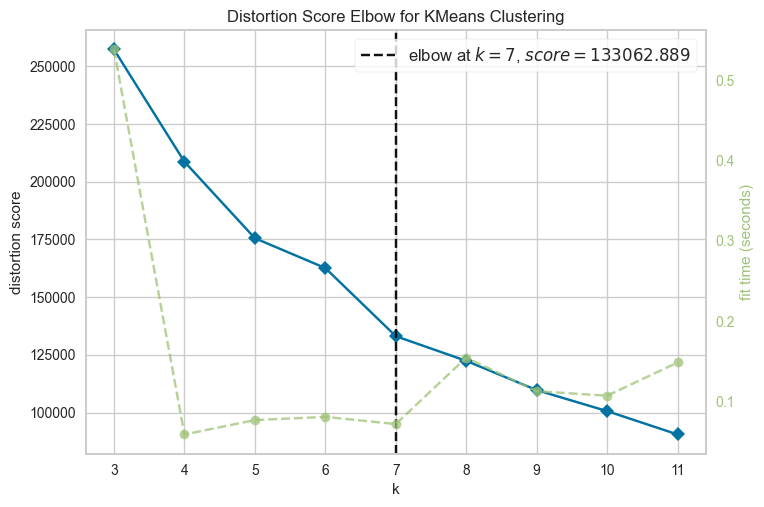

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [288]:
# 데이터 적용 
visualizer.fit(pca_df) 
visualizer.show()

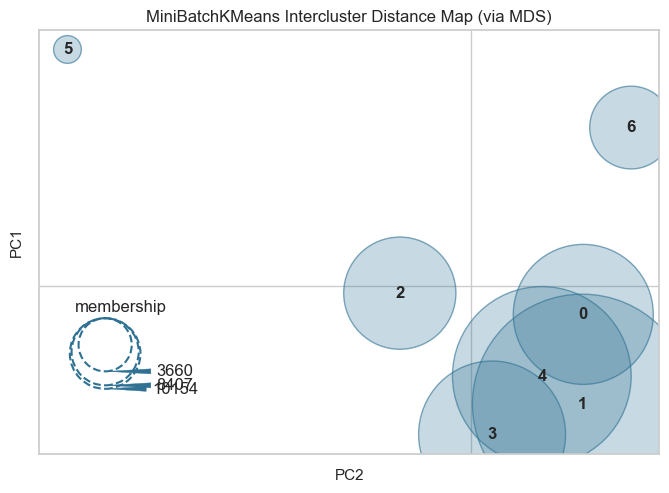

InterclusterDistance(ax=<Axes: title={'center': 'MiniBatchKMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=MiniBatchKMeans(n_clusters=7, random_state=42))

In [289]:
# 초기 k 값 참고를 위한 distance map 시각화
# 그룹의 갯수를 지정해 줄 수 있습니다. 저는 5로 적어두었습니다. 
intercluster_distance(MiniBatchKMeans(7, random_state=42), pca_df)

In [291]:
#  KMEANS
# 군집개수(n_cluster)는 5,초기 중심 설정방식 랜덤,  
kmeans = KMeans(n_clusters=7, random_state=42,init='random')

In [303]:
# pca df 를 이용한 kmeans 알고리즘 적용
kmeans.fit(pca_df)

KMeans(init='random', n_clusters=7, random_state=42)

In [293]:
# 클러스터 번호 가져오기 
labels = kmeans.labels_

In [294]:
# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})],axis = 1)

In [295]:
# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df

,PC1,PC2,PC3,Cluster
0,-0.200071,-0.224613,-0.302377,2
1,1.386981,-0.214407,0.445715,3
2,-0.036674,-0.099547,1.259816,3
3,0.037113,-0.193709,0.249420,3
4,0.408659,-0.537543,-0.159226,2
...,...,...,...,...
96533,-0.702532,-0.244512,-0.584054,2
96534,-0.464744,-0.357766,-0.506970,2
96535,-0.520235,0.337308,1.771414,3
96536,2.954086,-2.035562,-0.165665,5


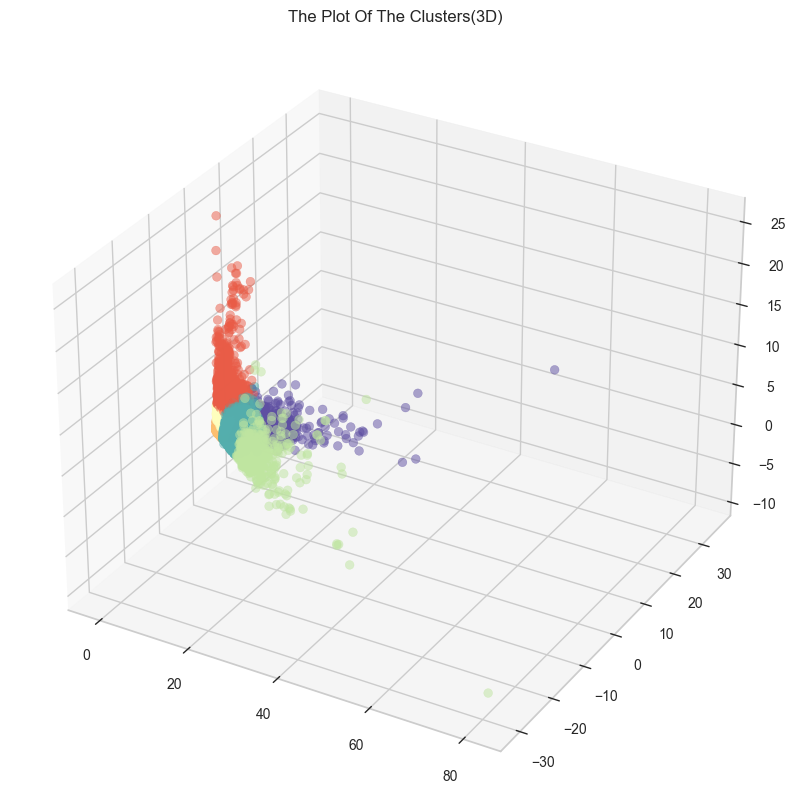

In [296]:
# 3차원으로 시각화 
x =kmeans_df["PC1"]
y =kmeans_df["PC2"]
z =kmeans_df["PC3"]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=kmeans_df["Cluster"], marker='o', alpha = 0.5, cmap = 'Spectral')
ax.set_title("The Plot Of The Clusters(3D)")

plt.show()

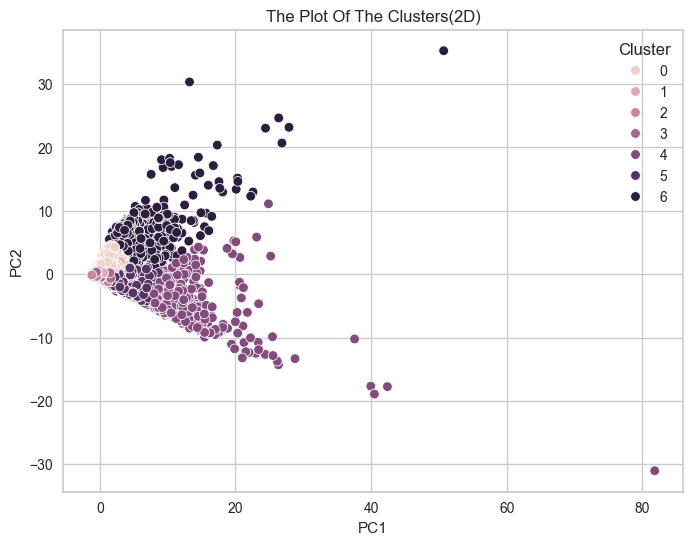

In [297]:
# 2차원으로 시각화

plt.figure(figsize=(8,6))

sns.scatterplot(data = kmeans_df, x = 'PC1', y='PC2', hue='Cluster')
plt.title('The Plot Of The Clusters(2D)')
plt.show()

In [311]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import OneHotEncoder

In [308]:
# 실루엣 계수 계산
silhouette_avg = silhouette_score(pca_df, labels)
print("For n_clusters =", 7,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 7 The average silhouette_score is : 0.3871850991596027


In [309]:
df

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_value,credit_per,wallet_per,voucher_per,debit_per,price,shipping_charges,order_item_id,region,shipping_period,period_diff
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-25,2017-06-05,1.0,146.87,1.0,0.0,0.0,0.0,124.99,21.88,1.0,SouthEast,9,-11
1,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-29,2018-02-06,1.0,335.48,1.0,0.0,0.0,0.0,289.00,46.48,1.0,SouthEast,17,-8
2,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-14,2018-06-13,1.0,157.73,1.0,0.0,0.0,0.0,139.94,17.79,1.0,SouthEast,26,1
3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-28,2018-04-10,1.0,173.30,1.0,0.0,0.0,0.0,149.94,23.36,1.0,SouthEast,15,-13
4,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-08-09,2018-08-15,1.0,252.25,1.0,0.0,0.0,0.0,230.00,22.25,1.0,SouthEast,11,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99294,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07,2018-04-13,2018-04-25,1.0,88.78,1.0,0.0,0.0,0.0,74.90,13.88,1.0,SouthEast,6,-12
99295,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04,2018-04-04,2018-04-11,2018-04-20,1.0,129.06,1.0,0.0,0.0,0.0,114.90,14.16,1.0,SouthEast,7,-9
99296,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08,2018-04-08,2018-05-09,2018-05-02,1.0,56.04,1.0,0.0,0.0,0.0,37.00,19.04,1.0,NorthEast,31,7
99297,73c2643a0a458b49f58cea58833b192e,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03,2017-11-03,2017-11-16,2017-12-05,1.0,711.07,1.0,0.0,0.0,0.0,689.00,22.07,1.0,South,13,-19


In [405]:
copy_df = df.copy()
encoder = OneHotEncoder()
encoded_region = encoder.fit_transform(copy_df[['region']]).toarray()
encoded_region

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [406]:
a = pd.get_dummies(copy_df['region'])
copy_df = pd.concat([copy_df,a], axis=1)
copy_df

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_value,...,shipping_charges,order_item_id,region,shipping_period,period_diff,MidWest,North,NorthEast,South,SouthEast
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-25,2017-06-05,1.0,146.87,...,21.88,1.0,SouthEast,9,-11,0,0,0,0,1
1,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-29,2018-02-06,1.0,335.48,...,46.48,1.0,SouthEast,17,-8,0,0,0,0,1
2,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-14,2018-06-13,1.0,157.73,...,17.79,1.0,SouthEast,26,1,0,0,0,0,1
3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-28,2018-04-10,1.0,173.30,...,23.36,1.0,SouthEast,15,-13,0,0,0,0,1
4,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-08-09,2018-08-15,1.0,252.25,...,22.25,1.0,SouthEast,11,-6,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99294,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07,2018-04-13,2018-04-25,1.0,88.78,...,13.88,1.0,SouthEast,6,-12,0,0,0,0,1
99295,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04,2018-04-04,2018-04-11,2018-04-20,1.0,129.06,...,14.16,1.0,SouthEast,7,-9,0,0,0,0,1
99296,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08,2018-04-08,2018-05-09,2018-05-02,1.0,56.04,...,19.04,1.0,NorthEast,31,7,0,0,1,0,0
99297,73c2643a0a458b49f58cea58833b192e,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03,2017-11-03,2017-11-16,2017-12-05,1.0,711.07,...,22.07,1.0,South,13,-19,0,0,0,1,0


In [428]:
# 클러스터링 할 컬럼 지정
feature_names=['payment_value','shipping_charges','shipping_period','MidWest','North','NorthEast','South','SouthEast']

# 지정된 컬럼으로 새로운 dataframe 생성 
copy_df = pd.DataFrame(copy_df, columns=feature_names)

# 표준화
# 표준화 방식: standard scaler (평균0, 분산1)
scale_df = StandardScaler().fit_transform(copy_df)

# 주성분 개수를 판단하기 위한 pca임의 시행 
pca = PCA(n_components=4)
pca.fit(scale_df)
# 설정한 주성분의 갯수로 전체 데이터 분산을 얼만큼 설명 가능한지 
pca.explained_variance_ratio_.sum()

0.7155076184087634

In [429]:
# pca 시행
pca_df = pca.fit_transform(scale_df)
pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3','PC4'])  

In [430]:
# Show the first 5 firms
pca_df.head()

,PC1,PC2,PC3,PC4
0,0.880363,0.393041,-0.071667,-0.027475
1,-0.093926,1.470818,-0.388873,-0.033207
2,0.289951,0.375828,0.595924,-0.194702
3,0.592364,0.512671,0.089999,-0.077782
4,0.670260,0.675164,-0.194143,-0.016946


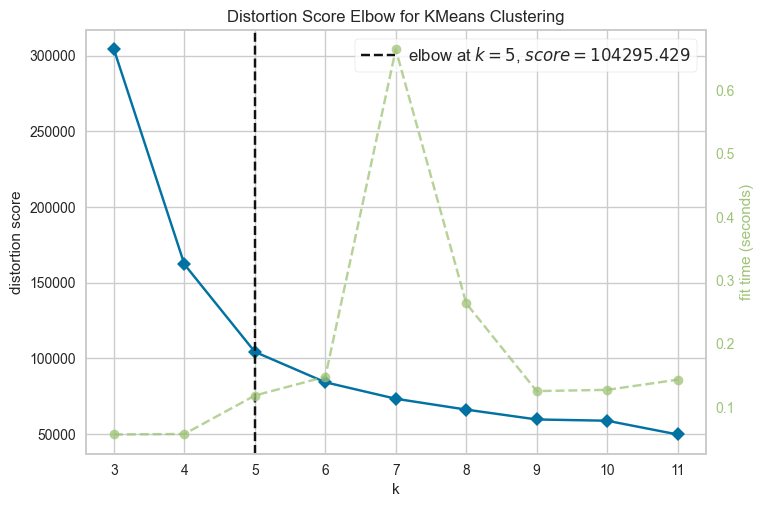

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [431]:
# 초기 k 값 참고를 위한 scree plot 을 그리고, 군집이 나뉘는 시간까지 고려한 k 값 확인 
model = KMeans()

# k 값의 범위를 조정해 줄 수 있습니다. 
visualizer = KElbowVisualizer(model, k=(3,12))

# 데이터 적용 
visualizer.fit(pca_df)
visualizer.show()

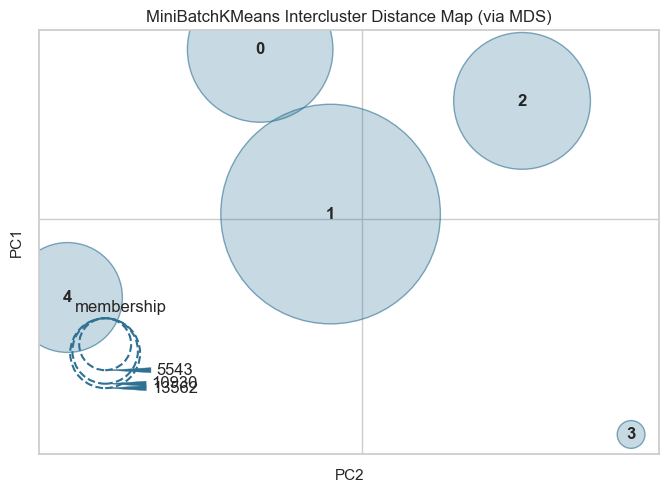

In [432]:
# 초기 k 값 참고를 위한 distance map 시각화
# 그룹의 갯수를 지정해 줄 수 있습니다. 저는 5로 적어두었습니다. 
intercluster_distance(MiniBatchKMeans(5, random_state=42), pca_df)

#  KMEANS
# 군집개수(n_cluster)는 5,초기 중심 설정방식 랜덤,  
kmeans = KMeans(n_clusters=5, random_state=42,init='random')

# pca df 를 이용한 kmeans 알고리즘 적용
kmeans.fit(pca_df)

# 클러스터 번호 가져오기 
labels = kmeans.labels_

# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})],axis = 1)


In [421]:
# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df

,PC1,PC2,PC3,PC4,PC5,Cluster
0,1.003563,0.675963,0.285419,-0.078593,-0.003591,0
1,0.059130,0.969846,1.350745,-0.373466,-0.046187,0
2,0.410091,0.698386,0.285869,0.550530,-0.048379,0
3,0.718125,0.716734,0.408834,0.074195,-0.021725,0
4,0.802070,0.755106,0.562333,-0.194264,-0.007660,0
...,...,...,...,...,...,...
96533,1.322329,0.581701,-0.054598,-0.002545,0.011469,0
96534,1.233879,0.613318,0.055385,-0.039783,0.009106,0
96535,-2.213160,1.084505,-0.465978,2.821848,-0.825916,5
96536,-1.915201,1.153778,-0.554128,-2.466402,-0.832522,1


In [382]:
kmeans_df.describe()

,PC1,PC2,PC3,PC4,Cluster
count,9.653800e+04,9.653800e+04,9.653800e+04,9.653800e+04,96538.000000
mean,-1.413166e-17,6.366607e-17,3.915647e-17,6.756699e-17,3.229122
std,1.462259e+00,1.265442e+00,1.095566e+00,1.038678e+00,1.223998
min,-4.478515e+01,-4.380664e+00,-8.964711e+00,-2.110559e+00,0.000000
25%,-1.044295e+00,-5.836450e-01,-3.184813e-01,-2.407743e-01,3.000000
50%,6.553049e-01,6.348482e-02,-5.410662e-02,-5.233616e-02,4.000000
75%,1.112680e+00,3.336709e-01,1.845838e-01,-1.472830e-02,4.000000
max,1.671060e+00,4.610719e+01,1.090270e+01,4.867059e+00,4.000000


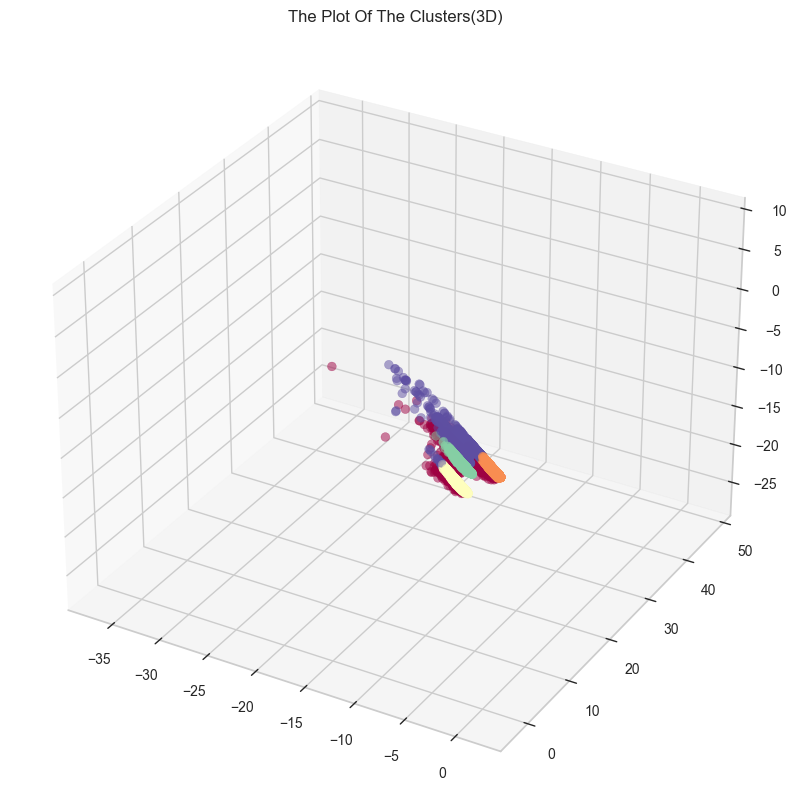

In [433]:
# 3차원으로 시각화 
x =kmeans_df["PC1"]
y =kmeans_df["PC2"]
z =kmeans_df["PC3"]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=kmeans_df["Cluster"], marker='o', alpha = 0.5, cmap = 'Spectral')
ax.set_title("The Plot Of The Clusters(3D)")

plt.show()

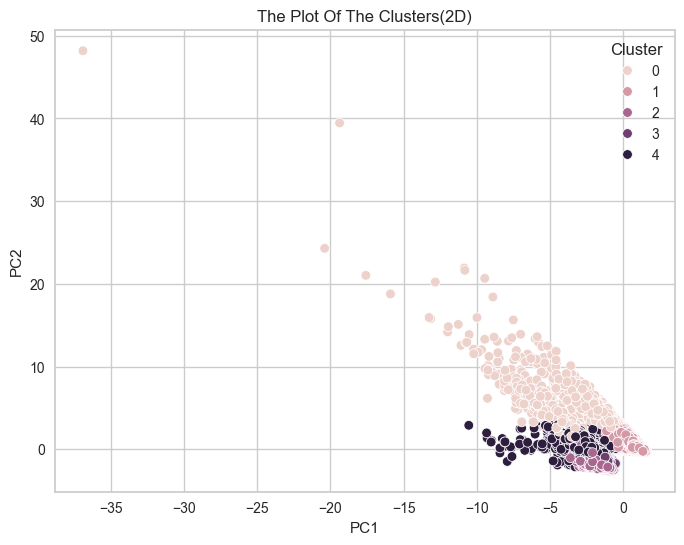

In [434]:
# 2차원으로 시각화

plt.figure(figsize=(8,6))

sns.scatterplot(data = kmeans_df, x = 'PC1', y='PC2', hue='Cluster')
plt.title('The Plot Of The Clusters(2D)')
plt.show()

In [369]:
# 실루엣 계수 계산
silhouette_avg = silhouette_score(pca_df, labels)
print("For n_clusters =", 6,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 6 The average silhouette_score is : 0.6649309176002708


In [435]:
df

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_value,credit_per,wallet_per,voucher_per,debit_per,price,shipping_charges,order_item_id,region,shipping_period,period_diff
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-25,2017-06-05,1.0,146.87,1.0,0.0,0.0,0.0,124.99,21.88,1.0,SouthEast,9,-11
1,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-29,2018-02-06,1.0,335.48,1.0,0.0,0.0,0.0,289.00,46.48,1.0,SouthEast,17,-8
2,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-14,2018-06-13,1.0,157.73,1.0,0.0,0.0,0.0,139.94,17.79,1.0,SouthEast,26,1
3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-28,2018-04-10,1.0,173.30,1.0,0.0,0.0,0.0,149.94,23.36,1.0,SouthEast,15,-13
4,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-08-09,2018-08-15,1.0,252.25,1.0,0.0,0.0,0.0,230.00,22.25,1.0,SouthEast,11,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99294,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07,2018-04-13,2018-04-25,1.0,88.78,1.0,0.0,0.0,0.0,74.90,13.88,1.0,SouthEast,6,-12
99295,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04,2018-04-04,2018-04-11,2018-04-20,1.0,129.06,1.0,0.0,0.0,0.0,114.90,14.16,1.0,SouthEast,7,-9
99296,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08,2018-04-08,2018-05-09,2018-05-02,1.0,56.04,1.0,0.0,0.0,0.0,37.00,19.04,1.0,NorthEast,31,7
99297,73c2643a0a458b49f58cea58833b192e,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03,2017-11-03,2017-11-16,2017-12-05,1.0,711.07,1.0,0.0,0.0,0.0,689.00,22.07,1.0,South,13,-19


In [ ]:
pca_sample['shipping_charges'] = np.log1p(pca_sample['shipping_charges'])

In [ ]:
pca_main['customer_region'] = le.fit_transform(pca_main['customer_region'])

In [442]:
df['region'].value_counts()

SouthEast    66218
South        13825
NorthEast     9062
MidWest       5636
North         1797
Name: region, dtype: int64

In [22]:
le = LabelEncoder()
copy_df = df.copy()
copy_df['region'] = le.fit_transform(copy_df['region'])
copy_df['payment_value'] = np.log1p(copy_df['payment_value'])
copy_df['price'] = np.log1p(copy_df['price'])
copy_df['shipping_charges'] = np.log1p(copy_df['shipping_charges'])
copy_df['shipping_period'] = np.log1p(copy_df['shipping_period'])
copy_df

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_value,credit_per,wallet_per,voucher_per,debit_per,price,shipping_charges,order_item_id,region,shipping_period,period_diff
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-25,2017-06-05,1.0,4.996334,1.0,0.0,0.0,0.0,4.836203,3.130263,1.0,4,2.302585,-11
1,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-29,2018-02-06,1.0,5.818539,1.0,0.0,0.0,0.0,5.669881,3.860309,1.0,4,2.890372,-8
2,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-14,2018-06-13,1.0,5.067205,1.0,0.0,0.0,0.0,4.948334,2.933325,1.0,4,3.295837,1
3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-28,2018-04-10,1.0,5.160778,1.0,0.0,0.0,0.0,5.016882,3.192942,1.0,4,2.772589,-13
4,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-08-09,2018-08-15,1.0,5.534377,1.0,0.0,0.0,0.0,5.442418,3.146305,1.0,4,2.484907,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99294,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07,2018-04-13,2018-04-25,1.0,4.497362,1.0,0.0,0.0,0.0,4.329417,2.700018,1.0,4,1.945910,-12
99295,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04,2018-04-04,2018-04-11,2018-04-20,1.0,4.867996,1.0,0.0,0.0,0.0,4.752728,2.718660,1.0,4,2.079442,-9
99296,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08,2018-04-08,2018-05-09,2018-05-02,1.0,4.043753,1.0,0.0,0.0,0.0,3.637586,2.997730,1.0,2,3.465736,7
99297,73c2643a0a458b49f58cea58833b192e,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03,2017-11-03,2017-11-16,2017-12-05,1.0,6.568176,1.0,0.0,0.0,0.0,6.536692,3.138533,1.0,3,2.639057,-19


In [72]:
#클러스터링 할 컬럼 지정
feature_names=['payment_value','price','shipping_charges','region','shipping_period','order_item_id']

# 지정된 컬럼으로 새로운 dataframe 생성 
test_df = pd.DataFrame(copy_df, columns=feature_names)

# 표준화
# 표준화 방식: standard scaler (평균0, 분산1)
scale_df = StandardScaler().fit_transform(test_df)

# 주성분 개수를 판단하기 위한 pca임의 시행 
pca = PCA(n_components=3)
pca.fit(scale_df)
# 설정한 주성분의 갯수로 전체 데이터 분산을 얼만큼 설명 가능한지 
pca.explained_variance_ratio_.sum()

0.819252039590894

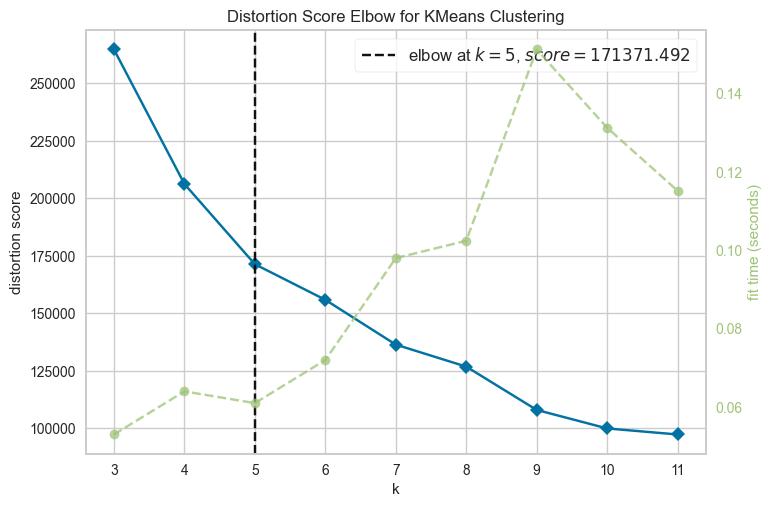

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
# pca 시행
pca_df = pca.fit_transform(scale_df)
pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3'])  

# 초기 k 값 참고를 위한 scree plot 을 그리고, 군집이 나뉘는 시간까지 고려한 k 값 확인 
model = KMeans()

# k 값의 범위를 조정해 줄 수 있습니다. 
visualizer = KElbowVisualizer(model, k=(3,12))

# 데이터 적용 
visualizer.fit(pca_df) 
visualizer.show()

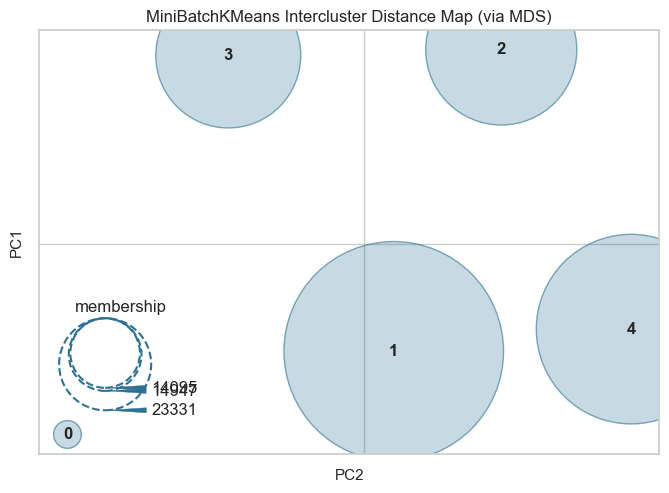

In [74]:
# 초기 k 값 참고를 위한 distance map 시각화
# 그룹의 갯수를 지정해 줄 수 있습니다. 저는 5로 적어두었습니다. 
intercluster_distance(MiniBatchKMeans(5, random_state=42), pca_df)

#  KMEANS
# 군집개수(n_cluster)는 5,초기 중심 설정방식 랜덤,  
kmeans = KMeans(n_clusters=5, random_state=42,init='random')

# pca df 를 이용한 kmeans 알고리즘 적용
kmeans.fit(pca_df)

# 클러스터 번호 가져오기 
labels = kmeans.labels_

# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})],axis = 1)

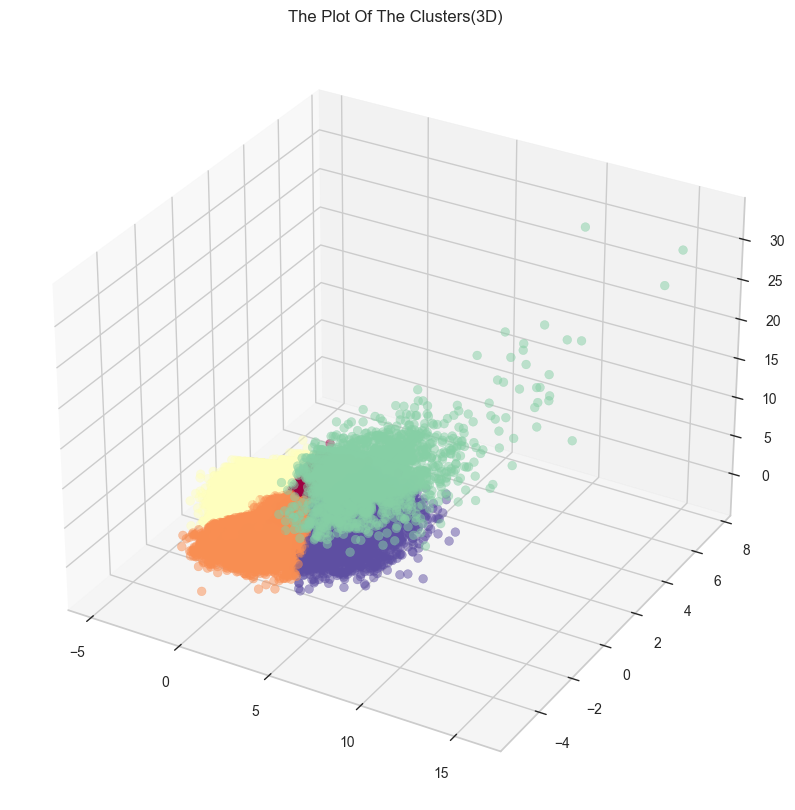

In [75]:
# 3차원으로 시각화 
x =kmeans_df["PC1"]
y =kmeans_df["PC2"]
z =kmeans_df["PC3"]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=kmeans_df["Cluster"], marker='o', alpha = 0.5, cmap = 'Spectral')
ax.set_title("The Plot Of The Clusters(3D)")

plt.show()

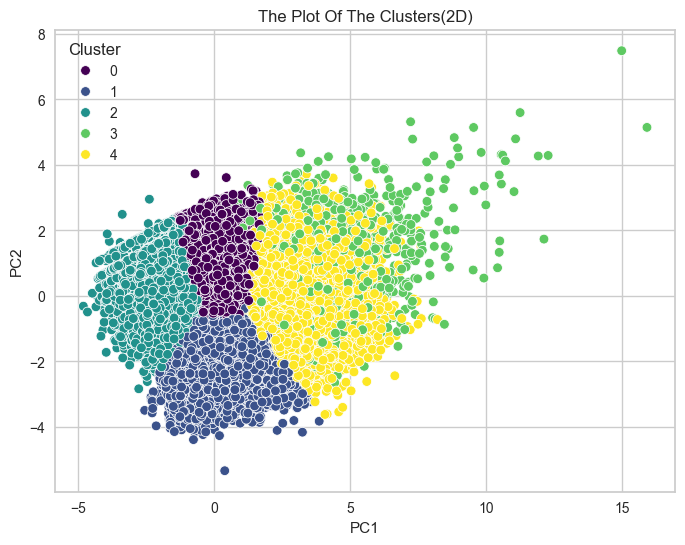

In [76]:
# 2차원으로 시각화
plt.figure(figsize=(8,6))

sns.scatterplot(data = kmeans_df, x = 'PC1', y='PC2', hue='Cluster',palette='viridis')
plt.title('The Plot Of The Clusters(2D)')
plt.show()

In [77]:
# 실루엣 계수 계산
silhouette_avg = silhouette_score(pca_df, labels)
print("For n_clusters =", 5,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.31803892718240023


# 밑에는 참고

In [128]:
df[df['order_id']=='895ab968e7bb0d5659d16cd74cd1650c']

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,price,shipping_charges,order_item_id,region,shipping_period,period_diff
20598,9a736b248f67d166d2fbb006bcb877c3,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08,2017-08-08,2017-08-14,2017-08-30,17.0,voucher,1.0,16.70,109.78,51.54,3.0,SouthEast,6 days,-16 days
20599,9a736b248f67d166d2fbb006bcb877c3,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08,2017-08-08,2017-08-14,2017-08-30,1.0,voucher,1.0,2.61,109.78,51.54,3.0,SouthEast,6 days,-16 days
20600,9a736b248f67d166d2fbb006bcb877c3,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08,2017-08-08,2017-08-14,2017-08-30,13.0,voucher,1.0,16.70,109.78,51.54,3.0,SouthEast,6 days,-16 days
20601,9a736b248f67d166d2fbb006bcb877c3,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08,2017-08-08,2017-08-14,2017-08-30,16.0,voucher,1.0,16.70,109.78,51.54,3.0,SouthEast,6 days,-16 days
20602,9a736b248f67d166d2fbb006bcb877c3,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08,2017-08-08,2017-08-14,2017-08-30,19.0,voucher,1.0,0.24,109.78,51.54,3.0,SouthEast,6 days,-16 days
20603,9a736b248f67d166d2fbb006bcb877c3,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08,2017-08-08,2017-08-14,2017-08-30,4.0,voucher,1.0,2.61,109.78,51.54,3.0,SouthEast,6 days,-16 days
20604,9a736b248f67d166d2fbb006bcb877c3,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08,2017-08-08,2017-08-14,2017-08-30,21.0,voucher,1.0,0.28,109.78,51.54,3.0,SouthEast,6 days,-16 days
20605,9a736b248f67d166d2fbb006bcb877c3,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08,2017-08-08,2017-08-14,2017-08-30,2.0,voucher,1.0,2.61,109.78,51.54,3.0,SouthEast,6 days,-16 days
20606,9a736b248f67d166d2fbb006bcb877c3,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08,2017-08-08,2017-08-14,2017-08-30,12.0,voucher,1.0,16.70,109.78,51.54,3.0,SouthEast,6 days,-16 days
20607,9a736b248f67d166d2fbb006bcb877c3,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08,2017-08-08,2017-08-14,2017-08-30,18.0,voucher,1.0,1.31,109.78,51.54,3.0,SouthEast,6 days,-16 days


In [129]:
df.columns

Index(['customer_id', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_timestamp', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'price', 'shipping_charges', 'order_item_id', 'region',
       'shipping_period', 'period_diff'],
      dtype='object')

In [27]:
df

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,...,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/25/2017 10:35,6/5/2017 0:00,...,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,toys,8683.0,54.0,64.0,31.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,1/12/2018 20:48,1/12/2018 20:58,1/29/2018 12:41,2/6/2018 0:00,...,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,housewares,10150.0,89.0,15.0,40.0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5/19/2018 16:07,5/20/2018 16:19,6/14/2018 17:58,6/13/2018 0:00,...,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,toys,8267.0,52.0,52.0,17.0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,3/13/2018 16:06,3/13/2018 17:29,3/28/2018 16:04,4/10/2018 0:00,...,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,office_furniture,12160.0,56.0,51.0,28.0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,7/29/2018 9:51,7/29/2018 10:10,8/9/2018 20:55,8/15/2018 0:00,...,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,toys,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127584,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,4/7/2018 15:48,4/7/2018 16:08,4/13/2018 20:06,4/25/2018 0:00,...,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,toys,611.0,22.0,22.0,23.0
127585,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,4/4/2018 8:20,4/4/2018 8:35,4/11/2018 18:54,4/20/2018 0:00,...,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,toys,1211.0,25.0,24.0,22.0
127586,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,4/8/2018 20:11,4/8/2018 20:30,5/9/2018 19:03,5/2/2018 0:00,...,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,toys,870.0,25.0,20.0,18.0
127587,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,11/3/2017 21:08,11/3/2017 21:31,11/16/2017 19:58,12/5/2017 0:00,...,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,toys,710.0,19.0,13.0,14.0


In [28]:
pd.merge(customers,orders,how='left',on='customer_id').isnull().sum()

customer_id                         0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                         2779
order_status                     2779
order_purchase_timestamp         2779
order_approved_at                2779
order_delivered_timestamp        2779
order_estimated_delivery_date    2779
dtype: int64

In [29]:
pd.merge(pd.merge(customers,orders,how='left',on='customer_id').dropna(),payments,how='left',on='order_id').isnull().sum()

customer_id                      0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
payment_sequential               1
payment_type                     1
payment_installments             1
payment_value                    1
dtype: int64

In [30]:
payments[pd.merge(pd.merge(customers,orders,how='left',on='customer_id').dropna(),payments,how='left',on='order_id')['payment_type'].isnull()==True]

C:\Users\user\AppData\Local\Temp\ipykernel_275128\913860544.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  payments[pd.merge(pd.merge(customers,orders,how='left',on='customer_id').dropna(),payments,how='left',on='order_id')['payment_type'].isnull()==True]


,order_id,payment_sequential,payment_type,payment_installments,payment_value
23132,fd5e05293e4e26b58d7cd6c75c7c9aec,1,credit_card,1,47.09


order_id가 달라서

In [31]:
pd.merge(pd.merge(pd.merge(customers,orders,how='left',on='customer_id').dropna(),payments,how='left',on='order_id').dropna(),order_items,how='left',on='order_id').isnull().sum()

customer_id                      0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
dtype: int64

In [32]:
pd.merge(pd.merge(pd.merge(pd.merge(customers,orders,how='left',on='customer_id').dropna(),payments,how='left',on='order_id').dropna(),order_items,how='left',on='order_id'),products,how='left',on='product_id').dropna()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,...,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/25/2017 10:35,6/5/2017 0:00,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,toys,8683.0,54.0,64.0,31.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,1/12/2018 20:48,1/12/2018 20:58,1/29/2018 12:41,2/6/2018 0:00,...,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,housewares,10150.0,89.0,15.0,40.0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5/19/2018 16:07,5/20/2018 16:19,6/14/2018 17:58,6/13/2018 0:00,...,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,toys,8267.0,52.0,52.0,17.0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,3/13/2018 16:06,3/13/2018 17:29,3/28/2018 16:04,4/10/2018 0:00,...,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,office_furniture,12160.0,56.0,51.0,28.0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,7/29/2018 9:51,7/29/2018 10:10,8/9/2018 20:55,8/15/2018 0:00,...,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,toys,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124802,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,4/7/2018 15:48,4/7/2018 16:08,4/13/2018 20:06,4/25/2018 0:00,...,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,toys,611.0,22.0,22.0,23.0
124803,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,4/4/2018 8:20,4/4/2018 8:35,4/11/2018 18:54,4/20/2018 0:00,...,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,toys,1211.0,25.0,24.0,22.0
124804,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,4/8/2018 20:11,4/8/2018 20:30,5/9/2018 19:03,5/2/2018 0:00,...,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,toys,870.0,25.0,20.0,18.0
124805,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,11/3/2017 21:08,11/3/2017 21:31,11/16/2017 19:58,12/5/2017 0:00,...,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,toys,710.0,19.0,13.0,14.0


요건 이유 모름

In [33]:
df.isnull().sum()

customer_id                      0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [34]:
df['order_purchase_timestamp'][0].split(' ')[0].split('/')

['5', '16', '2017']

In [35]:
len(df['order_purchase_timestamp'])

115282

In [36]:
df

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,...,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/25/2017 10:35,6/5/2017 0:00,...,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,toys,8683.0,54.0,64.0,31.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,1/12/2018 20:48,1/12/2018 20:58,1/29/2018 12:41,2/6/2018 0:00,...,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,housewares,10150.0,89.0,15.0,40.0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5/19/2018 16:07,5/20/2018 16:19,6/14/2018 17:58,6/13/2018 0:00,...,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,toys,8267.0,52.0,52.0,17.0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,3/13/2018 16:06,3/13/2018 17:29,3/28/2018 16:04,4/10/2018 0:00,...,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,office_furniture,12160.0,56.0,51.0,28.0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,7/29/2018 9:51,7/29/2018 10:10,8/9/2018 20:55,8/15/2018 0:00,...,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,toys,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127584,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,4/7/2018 15:48,4/7/2018 16:08,4/13/2018 20:06,4/25/2018 0:00,...,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,toys,611.0,22.0,22.0,23.0
127585,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,4/4/2018 8:20,4/4/2018 8:35,4/11/2018 18:54,4/20/2018 0:00,...,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,toys,1211.0,25.0,24.0,22.0
127586,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,4/8/2018 20:11,4/8/2018 20:30,5/9/2018 19:03,5/2/2018 0:00,...,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,toys,870.0,25.0,20.0,18.0
127587,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,11/3/2017 21:08,11/3/2017 21:31,11/16/2017 19:58,12/5/2017 0:00,...,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,toys,710.0,19.0,13.0,14.0


In [171]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'],format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d')
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'],format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d')
df['order_delivered_timestamp'] = pd.to_datetime(df['order_delivered_timestamp'],format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'],format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d')

In [38]:
df.isnull().sum()

customer_id                      0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [39]:
df['order_delivered_timestamp'].sort_values(ascending=False)

6644      2018-10-17
83421     2018-10-11
67454     2018-10-02
51183     2018-09-27
118420    2018-09-25
             ...    
25497     2016-10-13
2740      2016-10-13
52978     2016-10-11
119724    2016-10-11
119723    2016-10-11
Name: order_delivered_timestamp, Length: 115282, dtype: object

In [40]:
df['order_purchase_timestamp'].sort_values(ascending=False)

39634     2018-08-29
63901     2018-08-29
62065     2018-08-29
115338    2018-08-29
115337    2018-08-29
             ...    
70659     2016-10-03
25610     2016-10-03
24867     2016-10-03
9973      2016-10-03
14240     2016-10-03
Name: order_purchase_timestamp, Length: 115282, dtype: object

In [41]:
df.groupby('customer_id')['order_id'].nunique().value_counts().sort_values(ascending=False)

1     90252
2      2558
3       178
4        28
5         9
6         5
7         3
9         1
14        1
Name: order_id, dtype: int64

In [42]:
df.groupby('customer_id')['order_id'].nunique().value_counts()

1     90252
2      2558
3       178
4        28
5         9
6         5
7         3
9         1
14        1
Name: order_id, dtype: int64

In [43]:
payment_sum = df.groupby('customer_id')['payment_value'].agg(['sum']).reset_index()

In [44]:
payment_sum

,customer_id,sum
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
93030,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84
93031,fffea47cd6d3cc0a88bd621562a9d061,84.58
93032,ffff371b4d645b6ecea244b27531430a,112.46
93033,ffff5962728ec6157033ef9805bacc48,133.69


<Axes: xlabel='sum', ylabel='Count'>

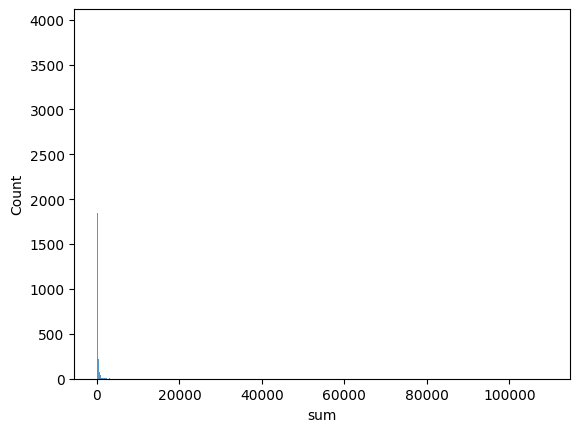

In [45]:
sns.histplot(payment_sum['sum'])

In [46]:
df.columns

Index(['customer_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_timestamp', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [47]:
df['shipping_charges'].isnull().sum()

0

In [48]:
df['payment_value'].isnull().sum()

0

In [49]:
df['sc_per'] = round(df['shipping_charges']/df['payment_value']*100,2)

In [50]:
df['sc_per'].describe()

count    115282.00
mean           inf
std            NaN
min           0.00
25%           9.56
50%          16.09
75%          26.21
max            inf
Name: sc_per, dtype: float64

In [51]:
df[df['sc_per']>=100]

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,...,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sc_per
47,ef07ba9aa5226f77264ffa5762b2280b,81750,curitiba,PR,a9119eb77d6200811953803a7b6539e1,delivered,2018-03-12,2018-03-12,2018-03-22,2018-03-29,...,aa280035c50ba62c746480a59045eec4,fa40cc5b934574b62717c68f3d678b6d,30.50,15.23,toys,200.0,16.0,8.0,11.0,1880.25
87,b3548d0cec408ae13d143bb4eeebaa6c,13323,salto,SP,db97652cf517d2cd03db63dec489ca62,delivered,2017-10-01,2017-10-01,2017-10-03,2017-10-18,...,6e79f7513adfd9ac67faa19f0d4ace53,7040e82f899a04d1b434b795a43b4617,19.90,7.78,toys,350.0,27.0,5.0,20.0,108.81
111,6d3f61e35d0422fd8cae65b1798784be,2175,sao paulo,SP,3f113daaf8b405bcc4349a2812061fa4,delivered,2017-10-27,2017-10-27,2017-11-01,2017-11-09,...,2c28b6fda526be32ed276b4dfc421acb,e5a3438891c0bfdb9394643f95273d8e,20.30,8.11,toys,200.0,16.0,2.0,11.0,140.55
139,1f6d48610f32c723924f9af3e88f1c64,2209,sao paulo,SP,dfc9bc36d5db98182f4b1dc41fe8e258,delivered,2017-09-21,2017-09-21,2017-09-25,2017-10-06,...,4cd6ba4ea3112de8fc238307c4dc6307,259f7b5e6e482c230e5bfaa670b6bb8f,39.90,11.73,toys,1000.0,35.0,8.0,25.0,144.81
188,ef6b4c0581dbf34e6eb5e33e0094c445,66050,belem,PA,c1f9d94c449d29a907aaf5963c2fc4f1,delivered,2018-05-08,2018-05-08,2018-05-21,2018-06-05,...,14e40526732f35d38620a487e0776b27,f0b47fbbc6dee9aafe415a6e33051b3f,39.99,20.40,toys,500.0,40.0,4.0,30.0,594.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127484,81978a4296d6dfda023d617d7695a9f5,11055,santos,SP,127e151835ed0bf4ea8e262040fa1c3d,delivered,2017-09-13,2017-09-13,2017-09-19,2017-10-02,...,a04a2402a7774ba53d10ed2ce29715e3,17ca9b9e9b9ef8fdb529001b49ebb50f,99.97,25.54,toys,3000.0,16.0,50.0,40.0,111.92
127561,b96d6a178adbabf269fd843b37327798,26112,belford roxo,RJ,357b4b724bbf34f1d64b1c5dfdc88120,delivered,2018-01-24,2018-01-24,2018-02-07,2018-02-22,...,bdc3291ab242ec1effc8eb0987850268,dbd66278cbfe1aa1000f90a217ca4695,29.90,14.10,toys,541.0,19.0,12.0,16.0,933.77
127562,b96d6a178adbabf269fd843b37327798,26112,belford roxo,RJ,357b4b724bbf34f1d64b1c5dfdc88120,delivered,2018-01-24,2018-01-24,2018-02-07,2018-02-22,...,bdc3291ab242ec1effc8eb0987850268,dbd66278cbfe1aa1000f90a217ca4695,29.90,14.10,toys,541.0,19.0,12.0,16.0,933.77
127570,4452b8ef472646c4cc042cb31a291f3b,12236,sao jose dos campos,SP,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25,2017-11-25,2017-12-04,2017-12-20,...,5d66715cc928aadd0074f61332698593,128639473a139ac0f3e5f5ade55873a5,19.90,12.48,toys,150.0,20.0,13.0,18.0,117.74


In [52]:
df.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,order_item_id,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sc_per
count,115282.000000,115282.000000,115282.000000,115282.000000,115282.000000,115282.000000,115282.000000,115282.000000,115282.000000,115282.000000,115282.000000,115282.00
mean,35044.947806,1.089997,2.941977,171.939377,1.196874,120.045861,19.992409,2106.477507,30.231476,16.596294,23.062343,inf
std,29833.609828,0.679600,2.776830,265.741237,0.700731,182.758245,15.740024,3772.903159,16.137630,13.424788,11.728126,NaN
min,1003.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,0.000000,7.000000,2.000000,6.000000,0.00
25%,11310.000000,1.000000,1.000000,60.950000,1.000000,39.900000,13.080000,300.000000,18.000000,8.000000,15.000000,9.56
50%,24310.000000,1.000000,2.000000,108.220000,1.000000,74.900000,16.280000,700.000000,25.000000,13.000000,20.000000,16.09
75%,58540.000000,1.000000,4.000000,189.000000,1.000000,133.900000,21.180000,1800.000000,38.000000,20.000000,30.000000,26.21
max,99980.000000,26.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,40425.000000,105.000000,105.000000,118.000000,inf


In [53]:
df['order_status'].value_counts()

delivered    115282
Name: order_status, dtype: int64

In [54]:
# 주문 상태 중 delivered만 사용
df = df[df['order_status']=='delivered']
df

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,...,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sc_per
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-25,2017-06-05,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,toys,8683.0,54.0,64.0,31.0,14.90
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-29,2018-02-06,...,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,housewares,10150.0,89.0,15.0,40.0,13.85
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-14,2018-06-13,...,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,toys,8267.0,52.0,52.0,17.0,11.28
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-28,2018-04-10,...,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,office_furniture,12160.0,56.0,51.0,28.0,13.48
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-08-09,2018-08-15,...,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,toys,5200.0,45.0,15.0,35.0,8.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127584,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07,2018-04-13,2018-04-25,...,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,toys,611.0,22.0,22.0,23.0,15.63
127585,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04,2018-04-04,2018-04-11,2018-04-20,...,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,toys,1211.0,25.0,24.0,22.0,10.97
127586,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08,2018-04-08,2018-05-09,2018-05-02,...,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,toys,870.0,25.0,20.0,18.0,33.98
127587,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03,2017-11-03,2017-11-16,2017-12-05,...,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,toys,710.0,19.0,13.0,14.0,3.10


In [55]:
df['product_category_name'].unique()

array(['toys', 'housewares', 'office_furniture', 'furniture_decor',
       'garden_tools', 'sports_leisure', 'bed_bath_table',
       'health_beauty', 'watches_gifts', 'computers_accessories',
       'telephony', 'cool_stuff', 'perfumery', 'electronics', 'baby',
       'home_appliances_2', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'auto', 'home_appliances',
       'stationery', 'art', 'pet_shop', 'music',
       'fashion_bags_accessories', 'fashion_shoes', 'fixed_telephony',
       'tablets_printing_image', 'musical_instruments',
       'costruction_tools_tools', 'market_place', 'consoles_games',
       'books_general_interest', 'industry_commerce_and_business',
       'computers', 'air_conditioning', 'audio', 'food_drink',
       'construction_tools_construction', 'fashion_underwear_beach',
       'luggage_accessories', 'kitchen_dining_laundry_garden_furniture',
       'fashion_male_clothing', 'agro_industry_and_commerce',
       'home_construction', 'costruc

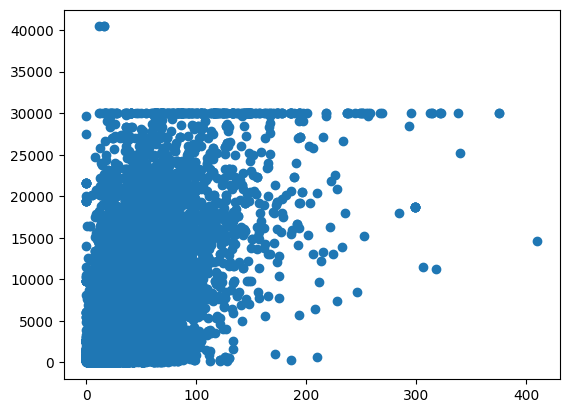

In [56]:
plt.scatter(df['shipping_charges'],df['product_weight_g'])

In [57]:
df[df['product_weight_g']>=35000][['price','shipping_charges','product_category_name','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]

,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
16892,80.0,12.06,toys,40425.0,13.0,65.0,28.0
48597,80.0,16.32,toys,40425.0,13.0,65.0,28.0
61088,80.0,16.32,toys,40425.0,13.0,65.0,28.0


In [58]:
df[df['shipping_charges']>=300]

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,...,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sc_per
7422,c6f70f6262d971489361b0d4fb0936ed,12460,campos do jordao,SP,9f49bd16053df810384e793386312674,delivered,2018-07-29,2018-07-31,2018-08-06,2018-08-22,...,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,1149.00,339.59,toys,25250.0,68.0,66.0,66.0,22.81
9701,aa4e2575d36a7b89546ca2e4087e9396,57045,maceio,AL,6ddfbf514959b49b6410c01ad93054bb,delivered,2017-11-23,2017-11-25,2017-12-20,2017-12-22,...,363a9f5b97bf194da23858be722a7aa5,9596c870880d900012f2e8e6e30d06d7,1045.00,314.40,construction_tools_construction,30000.0,100.0,50.0,50.0,23.13
27516,be2f2a80a6cfb6001c403b7a01c87db6,58840,pombal,PB,0e4672661531addf3fa0f55961e55242,delivered,2017-06-25,2017-06-27,2017-07-28,2017-08-08,...,dc861f18267cce21f3b70f9f7990b8ce,17f51e7198701186712e53a39c564617,990.00,314.02,toys,30000.0,55.0,75.0,61.0,24.08
34492,3d17b748f8eed69a279e77fa3c10b20b,59507,alto do rodrigues,RN,fe12e676fd493885d417a34bc3917411,delivered,2017-05-22,2017-05-22,2017-06-13,2017-07-05,...,1d16c0509e7011656e03c6a582ff6667,17f51e7198701186712e53a39c564617,760.00,312.41,toys,30000.0,55.0,75.0,61.0,29.13
47643,0820b88e46f48599042bd627fe954b66,36160,guarani,MG,c7a07ddd52bbe18b61da49a8d89853d3,delivered,2018-07-13,2018-07-13,2018-07-31,2018-08-15,...,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,1050.00,322.10,toys,30000.0,55.0,75.0,61.0,23.47
47929,95a744604de66a2e40e18086e69be4f2,58041,joao pessoa,PB,43bdbd9dc0931d72befdf4765af6c442,delivered,2018-07-06,2018-07-10,2018-07-24,2018-07-30,...,7e53e051875b2a0c9f22acd8a9a29a20,eeb6de78f79159600292e314a77cbd18,3089.00,317.47,industry_commerce_and_business,11300.0,44.0,34.0,25.0,9.32
58329,e3b3b57caa0974d93ed5218dde2ff4b3,2307,sao paulo,SP,0822bcde10bb5d023755a71bc8f7797f,delivered,2018-05-07,2018-05-07,2018-05-15,2018-05-22,...,363a9f5b97bf194da23858be722a7aa5,9596c870880d900012f2e8e6e30d06d7,990.00,321.46,construction_tools_construction,30000.0,100.0,50.0,50.0,24.51
91443,5e92460d739e8dd987e279285a1d278c,88053,florianopolis,SC,3fde74c28a3d5d618c00f26d51baafa0,delivered,2018-08-13,2018-08-15,2018-08-24,2018-09-05,...,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2338.08,375.28,toys,30000.0,75.0,58.0,65.0,13.83
94327,f140f377d666848e3712b51a2734d120,87013,maringa,PR,076d1555fb53a89b0ef4d529e527a0f6,delivered,2018-07-30,2018-08-01,2018-08-08,2018-08-14,...,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2338.08,375.28,toys,30000.0,75.0,58.0,65.0,13.83
95489,97734fdca127fddcb5f92f841690c3f2,64770,sao raimundo nonato,PI,a77e1550db865202c56b19ddc6dc4d53,delivered,2018-04-16,2018-04-19,2018-04-27,2018-05-17,...,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,979.00,409.68,baby,14675.0,55.0,64.0,52.0,29.50


In [59]:
df.groupby('customer_state')['shipping_charges'].agg(['mean'])

,mean
customer_state,
AC,40.134086
AL,35.831667
AM,33.080877
AP,34.236024
BA,26.363198
CE,32.445213
DF,21.135533
ES,21.953200
GO,22.576341


In [172]:
a = []
for i in df['customer_state']:
    if i in ['AC','AM','RO','PA','AP','RR','PA','TO']:
        a.append('North')
    elif i in ['MA','PI','CE','RN','PB','PE','AL','SE','BA']:
        a.append('NorthEast')
    elif i in ['MT','GO','DF','MS']:
        a.append('MidWest')
    elif i in ['SP','MG','RJ','ES']:
        a.append('SouthEast')
    else : 
        a.append('South')
a
df['region'] = a

In [61]:
df['region'].value_counts()

SouthEast    79354
South        16464
NorthEast    10649
MidWest       6720
North         2095
Name: region, dtype: int64

In [62]:
df.columns

Index(['customer_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_timestamp', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'sc_per',
       'region'],
      dtype='object')

In [63]:
df.groupby('region')['product_weight_g'].agg(['count','sum','max','mean','min']).round(2)

,count,sum,max,mean,min
region,,,,,
MidWest,6720,13086617.0,30000.0,1947.41,0.0
North,2095,4851252.0,30000.0,2315.63,50.0
NorthEast,10649,22449844.0,30000.0,2108.16,0.0
South,16464,34024990.0,40425.0,2066.63,0.0
SouthEast,79354,168426237.0,40425.0,2122.47,0.0


In [64]:
df.groupby('region')['shipping_charges'].agg(['count','sum','max','mean','min']).round(2)

,count,sum,max,mean,min
region,,,,,
MidWest,6720,154649.40,338.30,23.01,0.0
North,2095,77756.49,293.27,37.12,0.0
NorthEast,10649,342348.39,409.68,32.15,0.0
South,16464,349444.44,375.28,21.22,0.0
SouthEast,79354,1380566.14,339.59,17.40,0.0


In [65]:
df.groupby('region')['price'].agg(['count','sum','max','mean','min']).round(2)

,count,sum,max,mean,min
region,,,,,
MidWest,6720,880691.32,6735.0,131.06,3.90
North,2095,341353.86,3980.0,162.94,6.00
NorthEast,10649,1578858.03,4590.0,148.26,4.90
South,16464,1977729.20,3124.0,120.12,2.90
SouthEast,79354,9060494.52,6729.0,114.18,0.85


In [66]:
df.groupby('region')['payment_value'].agg(['count','sum','max','mean','min']).round(2)

,count,sum,max,mean,min
region,,,,,
MidWest,6720,1330681.11,6929.31,198.02,0.00
North,2095,482653.53,4042.74,230.38,0.66
NorthEast,10649,2279749.40,4681.78,214.08,0.10
South,16464,2903072.13,3666.42,176.33,0.03
SouthEast,79354,12825359.11,13664.08,161.62,0.00


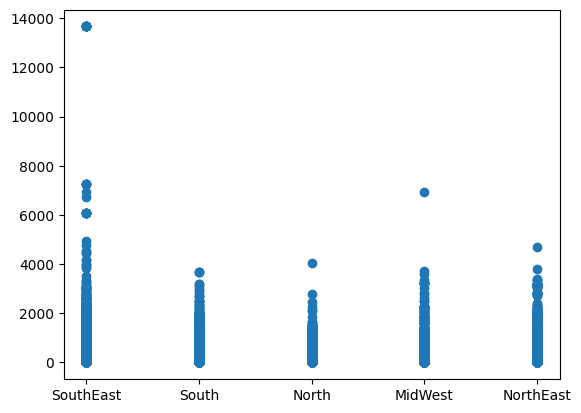

In [67]:
plt.scatter(df['region'],df['payment_value'])

<Axes: xlabel='region', ylabel='product_weight_g'>

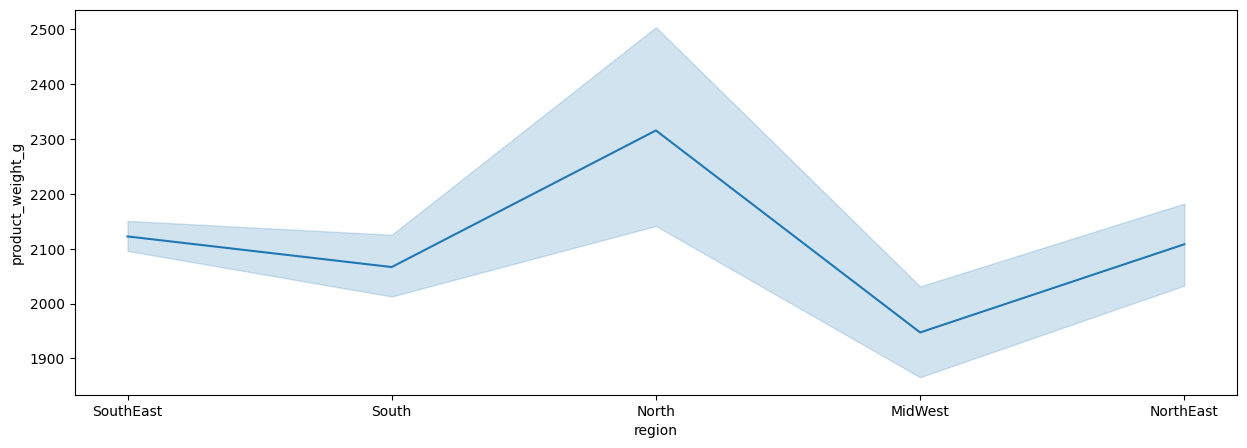

In [68]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['region'],y=df['product_weight_g'])

In [69]:
df[df['payment_value']>=10000]['order_item_id']

8009    1.0
8010    2.0
8011    3.0
8012    4.0
8013    5.0
8014    6.0
8015    7.0
8016    8.0
Name: order_item_id, dtype: float64

In [70]:
df['order_item_id'].value_counts()

1.0     100951
2.0      10097
3.0       2344
4.0        963
5.0        453
6.0        255
7.0         62
8.0         36
9.0         29
10.0        26
11.0        17
12.0        13
13.0         8
14.0         7
15.0         5
16.0         3
17.0         3
18.0         3
19.0         3
20.0         3
21.0         1
Name: order_item_id, dtype: int64

In [71]:
df[['order_item_id','price']]

,order_item_id,price
0,1.0,124.99
1,1.0,289.00
2,1.0,139.94
3,1.0,149.94
4,1.0,230.00
...,...,...
127584,1.0,74.90
127585,1.0,114.90
127586,1.0,37.00
127587,1.0,689.00


In [72]:
df['payment_sequential'].value_counts()

1.0     110345
2.0       3321
3.0        641
4.0        306
5.0        182
6.0        125
7.0         85
8.0         54
9.0         44
10.0        37
11.0        33
12.0        25
13.0        14
14.0        12
15.0        10
17.0         8
16.0         8
18.0         8
19.0         8
21.0         5
20.0         5
22.0         2
26.0         1
25.0         1
24.0         1
23.0         1
Name: payment_sequential, dtype: int64

In [73]:
df['payment_type'].value_counts()

credit_card    85093
wallet         22391
voucher         6145
debit_card      1653
Name: payment_type, dtype: int64

In [74]:
df.isnull().sum()

customer_id                      0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
sc_per                           0
region                           0
dtype: int64

In [75]:
df['order_delivered_timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 115282 entries, 0 to 127588
Series name: order_delivered_timestamp
Non-Null Count   Dtype 
--------------   ----- 
115282 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [76]:
pd.to_datetime(df['order_delivered_timestamp']) - pd.to_datetime(df['order_purchase_timestamp'])

0         9 days
1        17 days
2        26 days
3        15 days
4        11 days
           ...  
127584    6 days
127585    7 days
127586   31 days
127587   13 days
127588    7 days
Length: 115282, dtype: timedelta64[ns]

In [173]:
# 배송 기간
df['shipping_period'] = pd.to_datetime(df['order_delivered_timestamp']) - pd.to_datetime(df['order_purchase_timestamp'])

# 예상 배송 날짜와 실제 배송 기간의 차
df['period_diff'] = pd.to_datetime(df['order_delivered_timestamp']) - pd.to_datetime(df['order_estimated_delivery_date'])

df[['shipping_period','period_diff']]

,shipping_period,period_diff
0,9 days,-11 days
1,17 days,-8 days
2,26 days,1 days
3,15 days,-13 days
4,11 days,-6 days
...,...,...
127584,6 days,-12 days
127585,7 days,-9 days
127586,31 days,7 days
127587,13 days,-19 days


In [79]:
df.groupby('region')['shipping_period'].agg(['mean','max','min'])

,mean,max,min
region,,,
MidWest,14 days 19:46:55.714285714,181 days,1 days
North,22 days 10:48:51.551312649,196 days,4 days
NorthEast,19 days 19:01:01.188844023,195 days,1 days
South,13 days 22:31:23.965014577,186 days,1 days
SouthEast,10 days 15:30:06.033722307,210 days,0 days


In [80]:
df.groupby('region')['period_diff'].agg(['mean','max','min'])

,mean,max,min
region,,,
MidWest,-13 days +12:09:12.857142858,152 days,-69 days
North,-16 days +05:23:44.534606206,165 days,-60 days
NorthEast,-12 days +11:25:10.789745516,166 days,-140 days
South,-14 days +17:39:53.002915452,155 days,-135 days
SouthEast,-12 days +06:34:48.847443103,188 days,-147 days


In [81]:
df = df[df['product_weight_g']>0]

In [82]:
# 1kg당 배송비
df['shipping_charges_gram'] = df['shipping_charges'] / df['product_weight_g']
df['shipping_charges_gram'].sort_values()

C:\Users\user\AppData\Local\Temp\ipykernel_275128\936125297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shipping_charges_gram'] = df['shipping_charges'] / df['product_weight_g']


68261      0.000
77351      0.000
84801      0.000
39592      0.000
10405      0.000
           ...  
97903      7.895
29181      8.610
106294     9.255
113340    14.965
127227    19.800
Name: shipping_charges_gram, Length: 115274, dtype: float64

In [83]:
df[df['shipping_charges_gram']==0]['region'].value_counts()

SouthEast    264
South         55
NorthEast     50
MidWest       26
North          4
Name: region, dtype: int64

In [84]:
df['product_weight_g']

0          8683.0
1         10150.0
2          8267.0
3         12160.0
4          5200.0
           ...   
127584      611.0
127585     1211.0
127586      870.0
127587      710.0
127588       50.0
Name: product_weight_g, Length: 115274, dtype: float64

In [85]:
df.groupby('region')['shipping_charges_gram'].agg(['mean','max','min'])

,mean,max,min
region,,,
MidWest,0.046425,0.7430,0.0
North,0.073548,1.0340,0.0
NorthEast,0.062917,1.4834,0.0
South,0.042717,19.8000,0.0
SouthEast,0.033525,14.9650,0.0


In [86]:
df0 = df[df['shipping_charges']==0]
df1 = df[df['shipping_charges']>0]

In [87]:
len(df0)

399

In [88]:
df0['payment_type'].value_counts()

credit_card    311
wallet          68
voucher         12
debit_card       8
Name: payment_type, dtype: int64

In [89]:
print('credit_card: {} % \nwallet: {} % \nvoucher:{} % \ndebit_card: {} %'.format(round(df0['payment_type'].value_counts()[0]/len(df0)*100,2),
                                                                                  round(df0['payment_type'].value_counts()[1]/len(df0)*100,2),
                                                                                  round(df0['payment_type'].value_counts()[2]/len(df0)*100,2),
                                                                                  round(df0['payment_type'].value_counts()[3]/len(df0)*100,2)))

credit_card: 77.94 % 
wallet: 17.04 % 
voucher:3.01 % 
debit_card: 2.01 %


In [90]:
df1['shipping_charges_gram'].sort_values()
df1[df1['shipping_charges_gram']==np.inf]

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,...,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sc_per,region,shipping_period,period_diff,shipping_charges_gram


In [91]:
df1['payment_type'].value_counts()

credit_card    84774
wallet         22323
voucher         6133
debit_card      1645
Name: payment_type, dtype: int64

In [92]:
print('credit_card: {} % \nwallet: {} % \nvoucher:{} % \ndebit_card: {} %'.format(round(df1['payment_type'].value_counts()[0]/len(df1)*100,2),
                                                                                  round(df1['payment_type'].value_counts()[1]/len(df1)*100,2),
                                                                                  round(df1['payment_type'].value_counts()[2]/len(df1)*100,2),
                                                                                  round(df1['payment_type'].value_counts()[3]/len(df1)*100,2)))

credit_card: 73.8 % 
wallet: 19.43 % 
voucher:5.34 % 
debit_card: 1.43 %


In [93]:
df.groupby('customer_id')['order_id'].nunique().value_counts()

1     90246
2      2558
3       178
4        28
5         9
6         5
7         3
9         1
14        1
Name: order_id, dtype: int64

In [94]:
df['customer_id'].value_counts()

9a736b248f67d166d2fbb006bcb877c3    75
3e43e6105506432c953e165fb2acf44c    42
6fbc7cdadbb522125f4b27ae9dee4060    38
f9ae226291893fda10af7965268fb7f6    35
569aa12b73b5f7edeaa6f2a01603e381    26
                                    ..
6025e80315175e0241fc6e35c42916a9     1
1fa677123baa5518ae63c12d3f5c850f     1
7eb97a6a454479b6ca97f6928368d236     1
0470fa887a20e72b0d577348c9624dd9     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_id, Length: 93029, dtype: int64

In [134]:
df.columns

Index(['customer_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_timestamp', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'sc_per',
       'region', 'shipping_period', 'period_diff', 'shipping_charges_gram'],
      dtype='object')

In [96]:
df[df['customer_id']=='9a736b248f67d166d2fbb006bcb877c3'].value_counts()

customer_id                       customer_zip_code_prefix  customer_city  customer_state  order_id                          order_status  order_purchase_timestamp  order_approved_at  order_delivered_timestamp  order_estimated_delivery_date  payment_sequential  payment_type  payment_installments  payment_value  order_item_id  product_id                        seller_id                         price  shipping_charges  product_category_name  product_weight_g  product_length_cm  product_height_cm  product_width_cm  sc_per   region     shipping_period  period_diff  shipping_charges_gram
9a736b248f67d166d2fbb006bcb877c3  3227                      sao paulo      SP              67d83bd36ec2c7fb557742fb58837659  delivered     2017-07-27                2017-07-27         2017-08-01                 2017-08-16                     1.0                 voucher       1.0                   8.03           1.0            4eb99b5f0d7e411f246a5c9c0ae27a5e  53e4c6e0f4312d4d2107a8c9cddf45cd  45.20  26.97  

In [97]:
df[df['customer_id']=='8d50f5eadf50201ccdcedfb9e2ac8455'].value_counts()

customer_id                       customer_zip_code_prefix  customer_city  customer_state  order_id                          order_status  order_purchase_timestamp  order_approved_at  order_delivered_timestamp  order_estimated_delivery_date  payment_sequential  payment_type  payment_installments  payment_value  order_item_id  product_id                        seller_id                         price   shipping_charges  product_category_name     product_weight_g  product_length_cm  product_height_cm  product_width_cm  sc_per  region     shipping_period  period_diff  shipping_charges_gram
8d50f5eadf50201ccdcedfb9e2ac8455  4045                      sao paulo      SP              112eb6f37f1b9dabbced368fbbc6c9ef  delivered     2018-07-23                2018-07-24         2018-07-26                 2018-08-02                     1.0                 credit_card   1.0                   107.85         1.0            41f6cb7c3b1200749326e50106f32d58  db4350fd57ae30082dec7acbaacc17f9  99.00   8.8

In [98]:
a = df[df['customer_id']=='8d50f5eadf50201ccdcedfb9e2ac8455']
a[a['order_id']=='112eb6f37f1b9dabbced368fbbc6c9ef']

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,...,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sc_per,region,shipping_period,period_diff,shipping_charges_gram
18241,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,112eb6f37f1b9dabbced368fbbc6c9ef,delivered,2018-07-23,2018-07-24,2018-07-26,2018-08-02,...,toys,330.0,45.0,6.0,18.0,8.21,SouthEast,3 days,-7 days,0.026818


In [99]:
len(orders['order_id'].unique())

96456

In [100]:
len(customers)

99441

In [138]:
customers.drop_duplicates()['customer_id'].value_counts()

3e43e6105506432c953e165fb2acf44c    3
d44ccec15f5f86d14d6a2cfa67da1975    3
b9badb100ff8ecc16a403111209e3a06    3
9832ae2f7d3e5fa4c7a1a06e9551bc61    3
004b45ec5c64187465168251cd1c9c2f    2
                                   ..
a3953789c744ce9504d219e355203f89    1
21989dae247feb80638a5a7ae1d5c25d    1
626435c5a107c0f97cb12d8b104c3be5    1
448edc09db89e6e1d1f4a44bcee690a4    1
84732c5050c01db9b23e19ba39899398    1
Name: customer_id, Length: 96096, dtype: int64

In [101]:
orders['order_id']

0        e481f51cbdc54678b7cc49136f2d6af7
1        53cdb2fc8bc7dce0b6741e2150273451
2        47770eb9100c2d0c44946d9cf07ec65d
3        949d5b44dbf5de918fe9c16f97b45f8a
4        ad21c59c0840e6cb83a9ceb5573f8159
                       ...               
99436    9c5dedf39a927c1b2549525ed64a053c
99437    63943bddc261676b46f01ca7ac2f7bd8
99438    83c1379a015df1e13d02aae0204711ab
99439    11c177c8e97725db2631073c19f07b62
99440    66dea50a8b16d9b4dee7af250b4be1a5
Name: order_id, Length: 96456, dtype: object

In [102]:
df.groupby('order_id').value_counts()

order_id                          customer_id                       customer_zip_code_prefix  customer_city          customer_state  order_status  order_purchase_timestamp  order_approved_at  order_delivered_timestamp  order_estimated_delivery_date  payment_sequential  payment_type  payment_installments  payment_value  order_item_id  product_id                        seller_id                         price   shipping_charges  product_category_name  product_weight_g  product_length_cm  product_height_cm  product_width_cm  sc_per  region     shipping_period  period_diff  shipping_charges_gram
00010242fe8c5a6d1ba2dd792cb16214  871766c5855e863f6eccc05f988b23cb  28013                     campos dos goytacazes  RJ              delivered     2017-09-13                2017-09-13         2017-09-20                 2017-09-29                     1.0                 credit_card   2.0                   72.19          1.0            4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202

In [14]:
customers.drop_duplicates().groupby('customer_id')['customer_zip_code_prefix'].value_counts().sort_values()

KeyError: 'Column not found: customer_zip_code_prefix'

In [1]:
customers = customers[['customer_id','customer_state']].drop_duplicates()

NameError: name 'customers' is not defined

In [181]:
order_items = order_items[['order_id','product_id','price','shipping_charges']].drop_duplicates()

In [176]:
df = pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(customers,orders,how='left',on='customer_id')
                                ,payments,how='left',on='order_id')
                                ,order_items,how='left',on='order_id')
                                ,products,how='left',on='product_id')
df = df.dropna()

In [15]:
# frequency
df.groupby('customer_id')['order_id'].value_counts().sort_values()

customer_id                       order_id                        
0000366f3b9a7992bf8c76cfdf3221e2  e22acc9c116caa3f2b7121bbb380d08e     1
a75f7dc2280a40abca2b882ed167896c  090d3784ef3038b64220941aa370584b     1
a75f70497025368b4bb5664c6a591423  ca86f28287cc70b03cbb6db9c80f5a84     1
a75eb9d74a7e6f3a955ff5d663e8c74f  b0a8cc8421eab80e4bc4bc3a92cdefad     1
a75e134e7eb6f96e2b0c716ac2a82efb  6e6c4dabb25cc7d0d5792e6c6a0712ce     1
                                                                      ..
3806104dbbc3d14c17b091b3b8e38d59  364f451ee38a4268d7c15d317021eb35    20
2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4    22
db1af3fd6b23ac3873ef02619d548f9c  68986e4324f6a21481df4e6e89abcf01    24
569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13    26
9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c    42
Name: order_id, Length: 96133, dtype: int64

In [16]:
df[df['customer_id'] == '9a736b248f67d166d2fbb006bcb877c3']

,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
21396,9a736b248f67d166d2fbb006bcb877c3,SP,67d83bd36ec2c7fb557742fb58837659,delivered,7/27/2017 12:50,7/27/2017 13:15,8/1/2017 13:42,8/16/2017 0:00,7.0,voucher,1.0,1.27,4eb99b5f0d7e411f246a5c9c0ae27a5e,45.20,26.97,toys,15100.0,50.0,40.0,40.0
21397,9a736b248f67d166d2fbb006bcb877c3,SP,67d83bd36ec2c7fb557742fb58837659,delivered,7/27/2017 12:50,7/27/2017 13:15,8/1/2017 13:42,8/16/2017 0:00,9.0,voucher,1.0,8.00,4eb99b5f0d7e411f246a5c9c0ae27a5e,45.20,26.97,toys,15100.0,50.0,40.0,40.0
21398,9a736b248f67d166d2fbb006bcb877c3,SP,67d83bd36ec2c7fb557742fb58837659,delivered,7/27/2017 12:50,7/27/2017 13:15,8/1/2017 13:42,8/16/2017 0:00,6.0,voucher,1.0,8.00,4eb99b5f0d7e411f246a5c9c0ae27a5e,45.20,26.97,toys,15100.0,50.0,40.0,40.0
21399,9a736b248f67d166d2fbb006bcb877c3,SP,67d83bd36ec2c7fb557742fb58837659,delivered,7/27/2017 12:50,7/27/2017 13:15,8/1/2017 13:42,8/16/2017 0:00,1.0,voucher,1.0,8.03,4eb99b5f0d7e411f246a5c9c0ae27a5e,45.20,26.97,toys,15100.0,50.0,40.0,40.0
21400,9a736b248f67d166d2fbb006bcb877c3,SP,67d83bd36ec2c7fb557742fb58837659,delivered,7/27/2017 12:50,7/27/2017 13:15,8/1/2017 13:42,8/16/2017 0:00,10.0,voucher,1.0,0.74,4eb99b5f0d7e411f246a5c9c0ae27a5e,45.20,26.97,toys,15100.0,50.0,40.0,40.0
21401,9a736b248f67d166d2fbb006bcb877c3,SP,67d83bd36ec2c7fb557742fb58837659,delivered,7/27/2017 12:50,7/27/2017 13:15,8/1/2017 13:42,8/16/2017 0:00,2.0,voucher,1.0,8.00,4eb99b5f0d7e411f246a5c9c0ae27a5e,45.20,26.97,toys,15100.0,50.0,40.0,40.0
21402,9a736b248f67d166d2fbb006bcb877c3,SP,67d83bd36ec2c7fb557742fb58837659,delivered,7/27/2017 12:50,7/27/2017 13:15,8/1/2017 13:42,8/16/2017 0:00,11.0,voucher,1.0,4.00,4eb99b5f0d7e411f246a5c9c0ae27a5e,45.20,26.97,toys,15100.0,50.0,40.0,40.0
21403,9a736b248f67d166d2fbb006bcb877c3,SP,67d83bd36ec2c7fb557742fb58837659,delivered,7/27/2017 12:50,7/27/2017 13:15,8/1/2017 13:42,8/16/2017 0:00,3.0,voucher,1.0,8.00,4eb99b5f0d7e411f246a5c9c0ae27a5e,45.20,26.97,toys,15100.0,50.0,40.0,40.0
21404,9a736b248f67d166d2fbb006bcb877c3,SP,67d83bd36ec2c7fb557742fb58837659,delivered,7/27/2017 12:50,7/27/2017 13:15,8/1/2017 13:42,8/16/2017 0:00,5.0,voucher,1.0,8.00,4eb99b5f0d7e411f246a5c9c0ae27a5e,45.20,26.97,toys,15100.0,50.0,40.0,40.0
21405,9a736b248f67d166d2fbb006bcb877c3,SP,67d83bd36ec2c7fb557742fb58837659,delivered,7/27/2017 12:50,7/27/2017 13:15,8/1/2017 13:42,8/16/2017 0:00,4.0,voucher,1.0,8.00,4eb99b5f0d7e411f246a5c9c0ae27a5e,45.20,26.97,toys,15100.0,50.0,40.0,40.0


In [112]:
# 엘보우 방식 통해 클러스터 개수 계산
sse = []
scaler = StandardScaler()
rfm_scaled = np.log(rfm[['recency','frequency','monetary']])
rfm_scaled = scaler.fit_transform(rfm_scaled)

NameError: name 'StandardScaler' is not defined

In [ ]:
df.columns

Index(['customer_id', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_timestamp', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'shipping_charges_gram', 'region', 'shipping_period', 'period_diff'],
      dtype='object')

In [ ]:
df[df['order_id']=='895ab968e7bb0d5659d16cd74cd1650c'][['customer_id','order_id','region','payment_sequential','order_item_id','price','shipping_charges','payment_value','payment_type']]

,customer_id,order_id,region,payment_sequential,order_item_id,price,shipping_charges,payment_value,payment_type
24240,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,17.0,1.0,12.99,23.21,16.70,voucher
24241,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,17.0,2.0,12.99,23.21,16.70,voucher
24242,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,17.0,3.0,83.80,5.12,16.70,voucher
24243,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,1.0,1.0,12.99,23.21,2.61,voucher
24244,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,1.0,2.0,12.99,23.21,2.61,voucher
...,...,...,...,...,...,...,...,...,...
24298,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,9.0,2.0,12.99,23.21,2.61,voucher
24299,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,9.0,3.0,83.80,5.12,2.61,voucher
24300,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,6.0,1.0,12.99,23.21,2.61,voucher
24301,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,6.0,2.0,12.99,23.21,2.61,voucher


In [ ]:
df[df['customer_id']=='9a736b248f67d166d2fbb006bcb877c3'][['customer_id','order_id','region','payment_sequential','order_item_id','price','shipping_charges','payment_value','payment_type']]

,customer_id,order_id,region,payment_sequential,order_item_id,price,shipping_charges,payment_value,payment_type
24228,9a736b248f67d166d2fbb006bcb877c3,67d83bd36ec2c7fb557742fb58837659,SouthEast,7.0,1.0,45.20,26.97,1.27,voucher
24229,9a736b248f67d166d2fbb006bcb877c3,67d83bd36ec2c7fb557742fb58837659,SouthEast,9.0,1.0,45.20,26.97,8.00,voucher
24230,9a736b248f67d166d2fbb006bcb877c3,67d83bd36ec2c7fb557742fb58837659,SouthEast,6.0,1.0,45.20,26.97,8.00,voucher
24231,9a736b248f67d166d2fbb006bcb877c3,67d83bd36ec2c7fb557742fb58837659,SouthEast,1.0,1.0,45.20,26.97,8.03,voucher
24232,9a736b248f67d166d2fbb006bcb877c3,67d83bd36ec2c7fb557742fb58837659,SouthEast,10.0,1.0,45.20,26.97,0.74,voucher
...,...,...,...,...,...,...,...,...,...
24298,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,9.0,2.0,12.99,23.21,2.61,voucher
24299,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,9.0,3.0,83.80,5.12,2.61,voucher
24300,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,6.0,1.0,12.99,23.21,2.61,voucher
24301,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,6.0,2.0,12.99,23.21,2.61,voucher


In [ ]:
df[df['order_id']=='895ab968e7bb0d5659d16cd74cd1650c']['payment_sequential'].value_counts()

17.0    3
11.0    3
9.0     3
14.0    3
20.0    3
15.0    3
7.0     3
10.0    3
5.0     3
3.0     3
8.0     3
1.0     3
18.0    3
12.0    3
2.0     3
21.0    3
4.0     3
19.0    3
16.0    3
13.0    3
6.0     3
Name: payment_sequential, dtype: int64

In [133]:
a = df[df['customer_id']=='9a736b248f67d166d2fbb006bcb877c3']
a[a['payment_sequential']==19][['customer_id','order_id','region','payment_sequential','order_item_id','price','shipping_charges','payment_value','payment_type']]

,customer_id,order_id,region,payment_sequential,order_item_id,price,shipping_charges,payment_value,payment_type
24072,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,19.0,1.0,12.99,23.21,0.24,voucher
24073,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,19.0,2.0,12.99,23.21,0.24,voucher
24074,9a736b248f67d166d2fbb006bcb877c3,895ab968e7bb0d5659d16cd74cd1650c,SouthEast,19.0,3.0,83.80,5.12,0.24,voucher


In [127]:
a = df[['customer_id','order_id','order_purchase_timestamp']]
a = a.drop_duplicates('order_id')
a

,customer_id,order_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29
...,...,...,...
127584,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07
127585,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04
127586,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08
127587,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03


In [131]:
b = df[['customer_id','payment_value']]
b.groupby('customer_id')['payment_value'].sum()

customer_id
0000366f3b9a7992bf8c76cfdf3221e2     141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      27.19
0000f46a3911fa3c0805444483337064      86.22
0000f6ccb0745a6a4b88665a16c9f078      43.62
0004aac84e0df4da2b147fca70cf8255     196.89
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684    4134.84
fffea47cd6d3cc0a88bd621562a9d061      84.58
ffff371b4d645b6ecea244b27531430a     112.46
ffff5962728ec6157033ef9805bacc48     133.69
ffffd2657e2aad2907e67c3e9daecbeb      71.56
Name: payment_value, Length: 93029, dtype: float64

In [153]:
df

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sc_per,region,shipping_period,period_diff,shipping_charges_gram,recency
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-25,2017-06-05,...,8683.0,54.0,64.0,31.0,14.90,SouthEast,9 days,-11 days,0.002520,473 days
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-29,2018-02-06,...,10150.0,89.0,15.0,40.0,13.85,SouthEast,17 days,-8 days,0.004579,232 days
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-14,2018-06-13,...,8267.0,52.0,52.0,17.0,11.28,SouthEast,26 days,1 days,0.002152,105 days
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-28,2018-04-10,...,12160.0,56.0,51.0,28.0,13.48,SouthEast,15 days,-13 days,0.001921,172 days
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-08-09,2018-08-15,...,5200.0,45.0,15.0,35.0,8.82,SouthEast,11 days,-6 days,0.004279,34 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127584,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07,2018-04-13,2018-04-25,...,611.0,22.0,22.0,23.0,15.63,SouthEast,6 days,-12 days,0.022717,147 days
127585,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04,2018-04-04,2018-04-11,2018-04-20,...,1211.0,25.0,24.0,22.0,10.97,SouthEast,7 days,-9 days,0.011693,150 days
127586,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08,2018-04-08,2018-05-09,2018-05-02,...,870.0,25.0,20.0,18.0,33.98,NorthEast,31 days,7 days,0.021885,146 days
127587,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03,2017-11-03,2017-11-16,2017-12-05,...,710.0,19.0,13.0,14.0,3.10,South,13 days,-19 days,0.031085,302 days


In [124]:
df.columns

Index(['customer_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_timestamp', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'sc_per',
       'region', 'shipping_period', 'period_diff', 'shipping_charges_gram'],
      dtype='object')

In [ ]:
orders['order_id'].nunique()

99441

In [152]:
# Recency 최근
today = pd.to_datetime('2018-09-01')
a = today - pd.to_datetime(df['order_purchase_timestamp'])
df['recency'] = a
df.groupby('customer_id')['recency'].min()

C:\Users\user\AppData\Local\Temp\ipykernel_275128\1243124931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recency'] = a


customer_id
0000366f3b9a7992bf8c76cfdf3221e2   114 days
0000b849f77a49e4a4ce2b2a4ca5be3f   117 days
0000f46a3911fa3c0805444483337064   540 days
0000f6ccb0745a6a4b88665a16c9f078   324 days
0004aac84e0df4da2b147fca70cf8255   291 days
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684   450 days
fffea47cd6d3cc0a88bd621562a9d061   265 days
ffff371b4d645b6ecea244b27531430a   571 days
ffff5962728ec6157033ef9805bacc48   122 days
ffffd2657e2aad2907e67c3e9daecbeb   487 days
Name: recency, Length: 93029, dtype: timedelta64[ns]

In [166]:
# Frequency 빈도
a = df[['customer_id','order_id']]
a.groupby('customer_id')['order_id'].nunique().sort_values()

customer_id
0000366f3b9a7992bf8c76cfdf3221e2     1
a936a09f5e56a028c5ba4d6f6b744495     1
a93676a2b28d03546a7a9f349f1c6ed4     1
a935b95ae613a940c4a6dba690d21f3c     1
a934432d25f4a0a28d928de2c07ae155     1
                                    ..
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
3e43e6105506432c953e165fb2acf44c     9
8d50f5eadf50201ccdcedfb9e2ac8455    14
Name: order_id, Length: 93029, dtype: int64

In [ ]:

# rfm 만들기
rfm = df['order_purchase_timestamp','customer_id','']

In [116]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_table)
    sse.append(kmeans.inertia_)

NameError: name 'rfm_table' is not defined